In [1]:
import pandas as pd
import numpy as np

In [8]:
import torch
from transformers import AutoTokenizer
from transformers import TextClassificationPipeline
from transformers import AutoModelForSequenceClassification

/Users/lisa/projects/MTReviews/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Opening manually labeled sentences

In [2]:
manually_labeled = pd.read_csv('./manually_labeled_1505.csv')

In [3]:
len(manually_labeled)

3415

In [4]:
manually_labeled.label.value_counts()

label
vehicle                395
delay                  275
overpriced             221
unmet expectations     217
customer service       195
offer disparity        176
conditioning           174
appraisal              167
coordination           165
hazard                 142
bland delivery         132
cancelation            123
no substance           117
unrelated              106
theme divergence        85
guide's proficiency     82
rudeness & bigotry      72
dirty windows           68
haste                   65
stray                   48
shallow narration       46
time shortage           44
guide's attitude        41
refund                  39
price lift              33
weather | advice        33
other tourists          32
weather                 32
humble route            24
program change          21
fact misstatement       19
product                 11
food                     9
facilities               6
Name: count, dtype: int64

In [5]:
mapper = dict(zip(manually_labeled.label.unique().tolist(), [i for i in range(manually_labeled.label.nunique())]))

In [6]:
mapper

{'customer service': 0,
 'delay': 1,
 'no substance': 2,
 'unmet expectations': 3,
 'coordination': 4,
 "guide's attitude": 5,
 'conditioning': 6,
 'vehicle': 7,
 'appraisal': 8,
 'overpriced': 9,
 'offer disparity': 10,
 'cancelation': 11,
 'stray': 12,
 "guide's proficiency": 13,
 'program change': 14,
 'other tourists': 15,
 'unrelated': 16,
 'hazard': 17,
 'haste': 18,
 'dirty windows': 19,
 'bland delivery': 20,
 'price lift': 21,
 'time shortage': 22,
 'fact misstatement': 23,
 'theme divergence': 24,
 'food': 25,
 'refund': 26,
 'rudeness & bigotry': 27,
 'shallow narration': 28,
 'facilities': 29,
 'humble route': 30,
 'weather': 31,
 'product': 32,
 'weather | advice': 33}

In [7]:
id_mapper = dict(zip(list(mapper.values()), list(mapper.keys())))

In [9]:
MODEL_NAME = 'laskovey/review_train3'

In [10]:
tokenizer = AutoTokenizer.from_pretrained("laskovey/review_train4")

In [11]:
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME, num_labels=len(mapper), id2label=id_mapper, label2id=mapper
)
review_aspect_classifier = TextClassificationPipeline(model=model, tokenizer=tokenizer)

In [12]:
all_rev_sentences = pd.read_csv('./all_revs_sentences.csv')

In [13]:
len(all_rev_sentences)

1035076

In [14]:
all_rev_sentences.head()

REVIEW_ID                                           SENTENCE  \
0  BMKH63293691796166  Cпасибо за интересный, познавательный и весёлы...   
1  BMKH63293691796166      К сожалению, многое осталось не охваченным...   
2  BMKH63293691796166                            тема то очень объёмная.   
3  BMKH63293691796166  Предлагаю составить отдельно туры по Парадной ...   
4  BMKH63293691796166  Дмитрий (экскурсовод) без проблем и с удовольс...   

   DETAIL_RATING REVIEW_DETAIL  \
0            4.0       overall   
1            4.0       overall   
2            4.0       overall   
3            4.0       overall   
4            4.0       overall   

                                       SENTENCE_PROC  \
0  пасибо интересныи познавательныи веселыи тур к...   
1            сожалению многое осталось не охваченным   
2                                      тема объемная   
3  предлагаю составить отдельно туры параднои кол...   
4  дмитрии экскурсовод проблем удовольствием смож...   

                                    SENTENCE_STEMMED  
0  пасибо интересныи познавательныи веселыи тур к...  
1          сожаление многое оставаться не охватывать  
2                                      тема объемный  
3  предлагать составлять отдельно тур парадноя ко...  
4  дмитрий экскурсовод проблема удовольствие смоч...

In [15]:
all_rev_sentences = all_rev_sentences[all_rev_sentences.SENTENCE.notna()&(all_rev_sentences.SENTENCE.str.count(' ')>0)]

In [16]:
len(all_rev_sentences)

1008329

In [17]:
to_predict = all_rev_sentences.SENTENCE.to_list()

In [18]:
to_predict[-10:]

['Сказали,что дадут ,пока полиция будет смотреть.',
 'Но и этого не было.',
 'Спасики давали по просьбе на купание..',
 'При поздравлении именинника зажигались бенгальские огни и стоял неприятный запах.',
 'В обшивке судна много горючего материала.',
 'Было некомфортно.',
 'Даже не предложили жилеты, обгорели на солнце сидя на носу',
 'Мы поплыли в уже начинавшийся шторм.',
 'Возвращались по волнам метров 10.',
 'Я арабский немного знаю, капитан еще в начале ругался, что шторм и куда мы плывем']

In [19]:
%%time
predicted = review_aspect_classifier(to_predict)

CPU times: user 2h 48min 6s, sys: 2min 11s, total: 2h 50min 18s
Wall time: 1h 35min 39s


In [20]:
predicted[0]

{'label': 'stray', 'score': 0.9985132813453674}

In [23]:
pd.concat([all_rev_sentences.reset_index(drop=True), pd.DataFrame(predicted)], axis=1, ignore_index=True)

0  \
0        BMKH63293691796166   
1        BMKH63293691796166   
2        BMKH63293691796166   
3        BMKH63293691796166   
4        BMKH63293691796166   
...                     ...   
1008324  VWXJ26857830733070   
1008325  XKSS66652873949132   
1008326  LBJE48839236803746   
1008327  LBJE48839236803746   
1008328  LBJE48839236803746   

                                                         1    2        3  \
0        Cпасибо за интересный, познавательный и весёлы...  4.0  overall   
1            К сожалению, многое осталось не охваченным...  4.0  overall   
2                                  тема то очень объёмная.  4.0  overall   
3        Предлагаю составить отдельно туры по Парадной ...  4.0  overall   
4        Дмитрий (экскурсовод) без проблем и с удовольс...  4.0  overall   
...                                                    ...  ...      ...   
1008324                                  Было некомфортно.  2.0  comfort   
1008325  Даже не предложили жилеты, обгорели на солнце ...  1.0  comfort   
1008326               Мы поплыли в уже начинавшийся шторм.  1.0  comfort   
1008327                  Возвращались по волнам метров 10.  1.0  comfort   
1008328  Я арабский немного знаю, капитан еще в начале ...  1.0  comfort   

                                                         4  \
0        пасибо интересныи познавательныи веселыи тур к...   
1                  сожалению многое осталось не охваченным   
2                                            тема объемная   
3        предлагаю составить отдельно туры параднои кол...   
4        дмитрии экскурсовод проблем удовольствием смож...   
...                                                    ...   
1008324                                        некомфортно   
1008325     не предложили жилеты обгорели солнце сидя носу   
1008326                         поплыли начинавшиися шторм   
1008327                         возвращались волнам метров   
1008328  арабскии знаю капитан начале ругался шторм плывем   

                                                         5  \
0        пасибо интересныи познавательныи веселыи тур к...   
1                сожаление многое оставаться не охватывать   
2                                            тема объемный   
3        предлагать составлять отдельно тур парадноя ко...   
4        дмитрий экскурсовод проблема удовольствие смоч...   
...                                                    ...   
1008324                                        некомфортно   
1008325            не предлагать жилет обгорать солнце нос   
1008326                         поплыть начинавшиися шторм   
1008327                            возвращаться волна метр   
1008328       арабския капитан начало ругаться шторм плыть   

                          6         7  
0                     stray  0.998513  
1        unmet expectations  0.965033  
2              no substance  0.983520  
3            program change  0.931045  
4                     stray  0.979064  
...                     ...       ...  
1008324       dirty windows  0.654285  
1008325    weather | advice  0.799383  
1008326        coordination  0.642575  
1008327             weather  0.999873  
1008328               stray  0.534455  

[1008329 rows x 8 columns]

In [24]:
all_rev_sentences = pd.concat([all_rev_sentences.reset_index(drop=True), pd.DataFrame(predicted)], axis=1, ignore_index=True)

In [29]:
all_rev_sentences.columns = ['review_id', 'sentence', 'detail_rating', 'review_detail', 'sentence_proc', 'sentence_stemmed', 'predicted_label', 'prediction_score']

In [30]:
all_rev_sentences.to_csv('./labeled_predicted_2805.csv', index=False)

In [26]:
del predicted

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

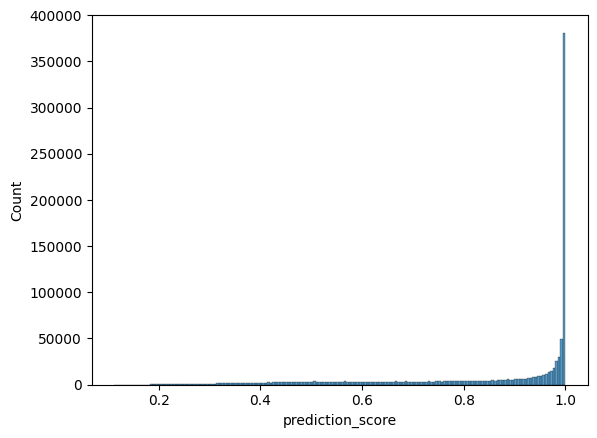

In [31]:
sns.histplot(data=all_rev_sentences[['prediction_score']], x='prediction_score')
plt.show()

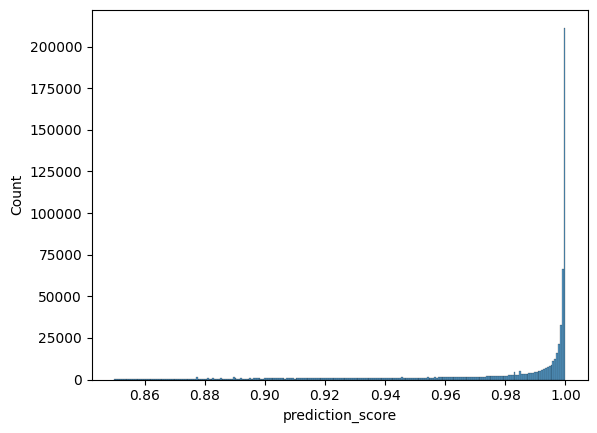

In [32]:
sns.histplot(data=all_rev_sentences[all_rev_sentences.prediction_score>.85][['prediction_score']], x='prediction_score')
plt.show()

In [35]:
all_rev_sentences[all_rev_sentences.prediction_score>=.98]

review_id  \
0        BMKH63293691796166   
2        BMKH63293691796166   
6        LMCZ80814792520945   
10       LMCZ80814792520945   
15       OXKB28872614231621   
...                     ...   
1008313  NLDT66577449632841   
1008316  KOZC01485125437598   
1008317  AXVQ41242918618925   
1008320  AXVQ41242918618925   
1008327  LBJE48839236803746   

                                                  sentence  detail_rating  \
0        Cпасибо за интересный, познавательный и весёлы...            4.0   
2                                  тема то очень объёмная.            4.0   
6        Дима - исключительно приятный собеседник, инте...            5.0   
10                                  Дима покажет, за что:)            5.0   
15                      Безусловно, must see в Петербурге.            5.0   
...                                                    ...            ...   
1008313  Представляйте тех безопастности примерно как н...            3.0   
1008316    О технике безопасности не было сказано ни слова            1.0   
1008317                                Обещали спасжилеты.            1.0   
1008320                                Но и этого не было.            1.0   
1008327                  Возвращались по волнам метров 10.            1.0   

        review_detail                                      sentence_proc  \
0             overall  пасибо интересныи познавательныи веселыи тур к...   
2             overall                                      тема объемная   
6             overall  дима исключительно приятныи собеседник интерес...   
10            overall                                       дима покажет   
15            overall                     безусловно must see петербурге   
...               ...                                                ...   
1008313       comfort      представляите безопастности примерно самолете   
1008316       comfort              технике безопасности не сказано слова   
1008317       comfort                                 обещали спасжилеты   
1008320       comfort                                                 не   
1008327       comfort                         возвращались волнам метров   

                                          sentence_stemmed predicted_label  \
0        пасибо интересныи познавательныи веселыи тур к...           stray   
2                                            тема объемный    no substance   
6        дима исключительно приятныи собеседник интерес...           stray   
10                                         дима показывать       unrelated   
15                           безусловно must see петербург       unrelated   
...                                                    ...             ...   
1008313        представляит безопастность примерно самолет  bland delivery   
1008316                    техника безопасность не сказать  bland delivery   
1008317                                  обещать спасжилет  bland delivery   
1008320                                                 не       unrelated   
1008327                            возвращаться волна метр         weather   

         prediction_score  
0                0.998513  
2                0.983520  
6                0.999226  
10               0.981165  
15               0.999757  
...                   ...  
1008313          0.999949  
1008316          0.999957  
1008317          0.999880  
1008320          0.982453  
1008327          0.999873  

[484880 rows x 8 columns]

In [ ]:
sns.histplot(data=all_rev_sentences[[7]], x=7)

In [53]:
del all_rev_sentences

## Clustering

## Finding common words for each aspect

Since each review aspect reflects a certain topic raised in the customer feedback, the sentences predicted to be a particular aspect will share a number of common words specific to those topics.

For instance, the "vehicle" aspect will likely feature words such as: car, bus, drive, seat, etc.

With determining these common words (or, if possible, bigrams), we can solve two issues:
1. getting a better understanding of the data
2. using these common words for further manual data labeling, increasing our train sample for achieving better model performance

It is important to note that several aspects will naturally contain common words (such as think, feel, I, excursion, etc.), thus we need to exclude them from consideration as stopwords.

Additionally, we may face the word present in different grammatical forms (красивый - красиво, автобус - автобуса - автобусу); therefore, as a part of analysis we need to perform stemming/lemmatization.

In [36]:
manually_labeled.head()

sentence               label
0                                     Хороший сервис    customer service
1  Встречающий "проводник" просто проводит вас до...               delay
2                     Сказали спутник вернёт 5 евро.    customer service
3           Очень перегружена историческими фактами.        no substance
4  Даже не ожидали, что такая замечательная экску...  unmet expectations

In [37]:
# Change "ё" to "е"
def e_replace(input_string):
    return input_string.replace('ё', 'е').replace('й','и')

In [45]:
import nltk
from nltk.corpus import stopwords

sputnik_sw = [
'экскурсия',
#'экскурсовод',
'экскурсионный',
#'автобус',
#'понравиться',
#'рассказывать',
'интересно',
'информация',
'интересный',
#'гид',
'турист'
]

with open("RussianStopWords.txt", "r") as f:
    new_sw = f.read().split('\n') 

len(new_sw)

sw = stopwords.words('russian') + new_sw + \
["c","а","алло","без","белый","близко","более","больше","большой","будем","будет","будете","будешь","будто","буду","будут","будь","бы","бывает","бывь","был","была","были","было","быть","в","важная","важное","важные","важный","вам","вами","вас","ваш","ваша","ваше","ваши","вверх","вдали","вдруг","ведь","везде","вернуться","весь","вечер","взгляд","взять","вид","видел","видеть","вместе","вне","вниз","внизу","во","вода","война","вокруг","вон","вообще","вопрос","восемнадцатый","восемнадцать","восемь","восьмой","вот","впрочем","времени","время","все","все еще","всегда","всего","всем","всеми","всему","всех","всею","всю","всюду","вся","всё","второй","вы","выйти","г","где","главный","глаз","говорил","говорит","говорить","год","года","году","голова","голос","город","да","давать","давно","даже","далекий","далеко","дальше","даром","дать","два","двадцатый","двадцать","две","двенадцатый","двенадцать","дверь","двух","девятнадцатый","девятнадцать","девятый","девять","действительно","дел","делал","делать","делаю","дело","день","деньги","десятый","десять","для","до","довольно","долго","должен","должно","должный","дом","дорога","друг","другая","другие","других","друго","другое","другой","думать","душа","е","его","ее","ей","ему","если","есть","еще","ещё","ею","её","ж","ждать","же","жена","женщина","жизнь","жить","за","занят","занята","занято","заняты","затем","зато","зачем","здесь","земля","знать","значит","значить","и","иди","идти","из","или","им","имеет","имел","именно","иметь","ими","имя","иногда","их","к","каждая","каждое","каждые","каждый","кажется","казаться","как","какая","какой","кем","книга","когда","кого","ком","комната","кому","конец","конечно","которая","которого","которой","которые","который","которых","кроме","кругом","кто","куда","лежать","лет","ли","лицо","лишь","лучше","любить","люди","м","маленький","мало","мать","машина","между","меля","менее","меньше","меня","место","миллионов","мимо","минута","мир","мира","мне","много","многочисленная","многочисленное","многочисленные","многочисленный","мной","мною","мог","могу","могут","мож","может","может быть","можно","можхо","мои","мой","мор","москва","мочь","моя","моё","мы","на","наверху","над","надо","назад","наиболее","найти","наконец","нам","нами","народ","нас","начала","начать","наш","наша","наше","наши","не","него","недавно","недалеко","нее","ней","некоторый","нельзя","нем","немного","нему","непрерывно","нередко","несколько","нет","нею","неё","ни","нибудь","ниже","низко","никакой","никогда","никто","никуда","ним","ними","них","ничего","ничто","но","новый","нога","ночь","ну","нужно","нужный","нх","о","об","оба","обычно","один","одиннадцатый","одиннадцать","однажды","однако","одного","одной","оказаться","окно","около","он","она","они","оно","опять","особенно","остаться","от","ответить","отец","откуда","отовсюду","отсюда","очень","первый","перед","писать","плечо","по","под","подойди","подумать","пожалуйста","позже","пойти","пока","пол","получить","помнить","понимать","понять","пор","пора","после","последний","посмотреть","посреди","потом","потому","почему","почти","правда","прекрасно","при","про","просто","против","процентов","путь","пятнадцатый","пятнадцать","пятый","пять","работа","работать","раз","разве","рано","раньше","ребенок","решить","россия","рука","русский","ряд","рядом","с","с кем","сам","сама","сами","самим","самими","самих","само","самого","самой","самом","самому","саму","самый","свет","свое","своего","своей","свои","своих","свой","свою","сделать","сеаой","себе","себя","сегодня","седьмой","сейчас","семнадцатый","семнадцать","семь","сидеть","сила","сих","сказал","сказала","сказать","сколько","слишком","слово","случай","смотреть","сначала","снова","со","собой","собою","советский","совсем","спасибо","спросить","сразу","стал","старый","стать","стол","сторона","стоять","страна","суть","считать","т","та","так","такая","также","таки","такие","такое","такой","там","твои","твой","твоя","твоё","те","тебе","тебя","тем","теми","теперь","тех","то","тобой","тобою","товарищ","тогда","того","тоже","только","том","тому","тот","тою","третий","три","тринадцатый","тринадцать","ту","туда","тут","ты","тысяч","у","увидеть","уж","уже","улица","уметь","утро","хороший","хорошо","хотел бы","хотеть","хоть","хотя","хочешь","час","часто","часть","чаще","чего","человек","чем","чему","через","четвертый","четыре","четырнадцатый","четырнадцать","что","чтоб","чтобы","чуть","шестнадцатый","шестнадцать","шестой","шесть","эта","эти","этим","этими","этих","это","этого","этой","этом","этому","этот","эту","я","являюсь"] 

len(sw)

sw = list(set(sw))

len(sw)

sw += ['мое', 'твое', 'целом']

not_sw  = [
'место',
'новый',
'времени',
'стоять',
'писать',
'хорошо',
'далекий',
'сказать',
'город',
'пойти',
'видел',
'меньше',
'менее',
'больше',
'час',
'дорога',
'хороший',
'минута',
'лучше',
'недалеко',
'прекрасно',
'заняты',
'занят',
'вернуться',
'большой',
'маленький',
'дом',
'начать',
'машина',
'увидеть',
'окно',
'москва',
'позже'
,'занята',
'деньги',
'остаться',
'старый',
'ребенок',
'смотреть']

sw = [w for w in sw if w not in not_sw]
len(sw)


for w in sw:
    if 'й' in w:
        sw.append(w.replace('й', 'и'))
    if 'ё' in w:
        sw.append(w.replace('ё', 'е'))

len(sw)

# Поскольку sentiment, нельзя убирать отрицания, поэтому уберём их из стоп-слов

sw = [w for w in sw if w not in ['не']]

sw += sputnik_sw
sw = list(set(sw))

len(sw)

584

In [38]:
import regex
import re


import unicodedata as ud
import string
from tqdm import tqdm
import regex
import re


def remove_dig_punct(input_string):
    if pd.notna(input_string):
        res = input_string.replace('.',' ').replace(',',' ')
        #regex = re.compile('[%s]' % re.escape(string.punctuation))
        remove_digits = str.maketrans('', '', string.digits)
        res = res.translate(remove_digits)
        res.replace
        res = regex.sub(r"\p{P}(?<!-)", "", res)
        
    else:
        res = np.nan
    return res


RE_BAD_CHARS = regex.compile(r"[\p{Cc}\p{Cs}]+")
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

def remove_bad_chars(text):
    if pd.notna(text):
        t = RE_BAD_CHARS.sub("", text)
        t = re.sub(r'[{#№$%\+\=^\&\[\]\{\}\<\>\-\|\~\`\'\"}]', '', t)
        t = emoji_pattern.sub(r'', t)
        t = remove_dig_punct(t)
        t = ' '.join(t.split())
        t = t.strip(' ')
        t = t.strip(' ')
    else:
        t = np.nan
    return t

In [39]:
letterstring = ' -absdefghijklmnopqrstuvwxyzабвгдеёжзийклмнопрстуфхцчшщъыьэюя'

def only_letters(text):
    res = ''
    if pd.notna(text):
        for c in text:
            if c.lower() in letterstring:
                res += c
    if res=='':
        res = np.nan
    return res

In [59]:
def text_preprocessing(text):
    t = text
    if pd.notna(text):
        #t = only_letters(remove_bad_chars(e_replace(t.lower())))
        t = only_letters(remove_bad_chars(t.lower()))
        if pd.notna(t):
            t_split = t.split(' ')
            #for i in range(len(t_split), 0, -1):
                #if t_split[i-1] in sw:
                    #del t_split[i-1]
            t = ' '.join(t_split)
    return t

In [65]:
from pymystem3 import Mystem
m = Mystem()

def lemmatizing(text):
    t = text
    if pd.notna(text):
        # list of lists
        t = [m.lemmatize(w) for w in text.split(' ')]
        # Just list of lemmatized words
        t = [w for l in t for w in l if w not in ['\n', '', ' ']]
        #t = ' '.join([w for w in t if w not in sw])

    return t

def keep_negation(text):
    t = ' '.join(text)
    if pd.notna(t) and (t.startswith('не ') or ' не ' in t):
        t = t.replace('не ', 'не_')

    #Повисшие не в конце предложения
    if pd.notna(t) and (t.endswith('не_') or t.endswith(' не')):
        t = t[:-3]
    
    t = t.split(' ')

    return t

In [63]:
def final_processing(text):
    res = np.nan
    if pd.notna(text):
        res = keep_negation(lemmatizing(text_preprocessing(text)))
    return res

In [66]:
final_processing('ничего хорошего не было, всё грустно')

['ничего', 'хороший', 'не_быть', 'все', 'грустно']

In [67]:
%%time
manually_labeled['words'] = manually_labeled.sentence.apply(final_processing)

CPU times: user 1.26 s, sys: 324 ms, total: 1.59 s
Wall time: 3.8 s


In [68]:
manually_labeled

sentence               label  \
0                                        Хороший сервис    customer service   
1     Встречающий "проводник" просто проводит вас до...               delay   
2                        Сказали спутник вернёт 5 евро.    customer service   
3              Очень перегружена историческими фактами.        no substance   
4     Даже не ожидали, что такая замечательная экску...  unmet expectations   
...                                                 ...                 ...   
3410  Но большинство наших "коллег" по экскурсии - т...      other tourists   
3411   Автобус подан не подготовленный: мусор в салоне.             vehicle   
3412                                Цена не оправданна.          overpriced   
3413                                        Дороговато!          overpriced   
3414                       Мало информации,общие фразы.        no substance   

                                                  words  
0                                     [хороший, сервис]  
1     [встречать, проводник, просто, проводить, вы, ...  
2                     [сказать, спутник, вернуть, евро]  
3              [очень, перегружать, исторический, факт]  
4     [даже, не_ожидать, что, такой, замечательный, ...  
...                                                 ...  
3410  [но, большинство, наш, коллега, по, экскурсия,...  
3411  [автобус, подавать, не_подготовить, мусор, в, ...  
3412                             [цена, не_оправданный]  
3413                                      [дороговатый]  
3414                   [мало, информация, общий, фраза]  

[3415 rows x 3 columns]

In [69]:
word_dict = dict()
for label in manually_labeled.label.unique():
    word_dict[label] = manually_labeled[manually_labeled.label==label].words.to_list()

In [71]:
uniq_word_dict = dict()
for label in word_dict:
    uniq_word_dict[label] = list(set([i for l in word_dict[label] for i in l]))

In [72]:
uniq_word_dict

{'customer service': ['не_понятно',
  'понедельник',
  'экстренный',
  'не_клиентоориентированный',
  'же',
  'быстро',
  'сорок',
  'поздно',
  'не_радовать',
  'наличка',
  'суть',
  'изменение',
  'тратить',
  'не_состояться',
  'не_оказывать',
  'хамство',
  'уважать',
  'объяснять',
  'июнь',
  'все',
  'возвращать',
  'день',
  'ответ',
  'кто',
  'повод',
  'связываться',
  'женщина',
  'хорошо',
  'становиться',
  'сразу',
  'робот',
  'распечатывать',
  'доплачивать',
  'короновирусный',
  'торговый',
  'ситуация',
  'звонок',
  'приходиться',
  'тот',
  'не_порекомендовать',
  'проблемно',
  'организаторгид',
  'агент',
  'сайт',
  'информация',
  'дневной',
  'предлагать',
  'вообще',
  'видеть',
  'орган',
  'делать',
  'ни',
  'телефонбезликий',
  'поехать',
  'скоро',
  'совать',
  'даже',
  'посещение',
  'спутник',
  'она',
  'отвратительный',
  'бывать',
  'еще',
  'письмо',
  'накануне',
  'несмотря',
  'нашелсявсе',
  'около',
  'очень',
  'руб',
  'там',
  'необходи

Searching for words unique to aspects:

In [73]:
repeat_words = dict()

for label in uniq_word_dict:
    repeat_words[label] = []
    for word in uniq_word_dict[label]:
        for label2 in uniq_word_dict:
            if label!=label2 and word in uniq_word_dict[label2]:
                repeat_words[label].append(word)
    

In [74]:
for label in uniq_word_dict:
    uniq_word_dict[label] = list(set(uniq_word_dict[label]) - set(repeat_words[label]))

In [75]:
uniq_word_dict

{'customer service': ['экстренный',
  'передомна',
  'не_клиентоориентированный',
  'рассылать',
  'сорок',
  'не_сейчас',
  'не_радовать',
  'безуспешно',
  'не_брать',
  'вайбер',
  'команда',
  'тратить',
  'параллель',
  'не_оказывать',
  'накануне_экскурсия',
  'тюз',
  'уважать',
  'не_берет',
  'не_встретилим',
  'июнь',
  'оперативно',
  'профсервис',
  'дозвон',
  'не_решать',
  'действие',
  'занятый',
  'не_подтвердить',
  'кабинет',
  'скидывать',
  'штрихкод',
  'распечатывать',
  'альтернатива',
  'короновирусный',
  'инфо',
  'email',
  'руководство',
  'не_порекомендовать',
  'жесткий',
  'телефонный',
  'проблемно',
  'организаторгид',
  'банкомат',
  'разбор',
  'поставляться',
  'агент',
  'провисеть',
  'дневной',
  'оповещение',
  'орган',
  'кругозор',
  'телефонбезликий',
  'линия',
  'запрос',
  'совать',
  'контрольный',
  'корреспонденция',
  'некомпетентность',
  'кассир',
  'не_поступать',
  'резво',
  'срочно',
  'не_обязанный',
  'не_сразу',
  'неправда',


In [87]:
count_words_dict = dict()

for label in word_dict:
    count_words_dict[label] ={}
    temp = [i for lst in word_dict[label] for i in lst]
    for w in set(temp):
        count_words_dict[label][w] = temp.count(w)

In [88]:
count_words_dict

{'customer service': {'не_понятно': 1,
  'понедельник': 1,
  'экстренный': 1,
  'не_клиентоориентированный': 1,
  'же': 6,
  'быстро': 2,
  'сорок': 1,
  'поздно': 3,
  'не_радовать': 1,
  'наличка': 1,
  'суть': 1,
  'изменение': 2,
  'тратить': 1,
  'не_состояться': 2,
  'не_оказывать': 1,
  'хамство': 1,
  'уважать': 1,
  'объяснять': 1,
  'июнь': 2,
  'все': 23,
  'возвращать': 1,
  'день': 13,
  'ответ': 5,
  'кто': 2,
  'повод': 2,
  'связываться': 9,
  'женщина': 1,
  'хорошо': 1,
  'становиться': 1,
  'сразу': 4,
  'робот': 1,
  'распечатывать': 2,
  'доплачивать': 1,
  'короновирусный': 1,
  'торговый': 1,
  'ситуация': 1,
  'звонок': 29,
  'приходиться': 6,
  'тот': 1,
  'не_порекомендовать': 1,
  'проблемно': 1,
  'организаторгид': 1,
  'агент': 1,
  'сайт': 20,
  'информация': 6,
  'дневной': 1,
  'предлагать': 1,
  'вообще': 4,
  'видеть': 1,
  'орган': 1,
  'делать': 1,
  'ни': 9,
  'телефонбезликий': 1,
  'поехать': 1,
  'скоро': 1,
  'совать': 1,
  'даже': 4,
  'посещен

In [89]:
uniq_with_count = dict()

for label in uniq_word_dict:
    for w in uniq_word_dict[label]:
        uniq_with_count[w] = {'label': label, 'freq': count_words_dict[label][w]}


In [90]:
uniq_with_count

{'экстренный': {'label': 'customer service', 'freq': 1},
 'передомна': {'label': 'customer service', 'freq': 1},
 'не_клиентоориентированный': {'label': 'customer service', 'freq': 1},
 'рассылать': {'label': 'customer service', 'freq': 1},
 'сорок': {'label': 'customer service', 'freq': 1},
 'не_сейчас': {'label': 'customer service', 'freq': 1},
 'не_радовать': {'label': 'customer service', 'freq': 1},
 'безуспешно': {'label': 'customer service', 'freq': 1},
 'не_брать': {'label': 'customer service', 'freq': 2},
 'вайбер': {'label': 'customer service', 'freq': 1},
 'команда': {'label': 'customer service', 'freq': 1},
 'тратить': {'label': 'customer service', 'freq': 1},
 'параллель': {'label': 'customer service', 'freq': 1},
 'не_оказывать': {'label': 'customer service', 'freq': 1},
 'накануне_экскурсия': {'label': 'customer service', 'freq': 1},
 'тюз': {'label': 'customer service', 'freq': 1},
 'уважать': {'label': 'customer service', 'freq': 1},
 'не_берет': {'label': 'customer ser

In [93]:
uniq_with_count_df = pd.DataFrame.from_dict(uniq_with_count, orient='index')

In [96]:
uniq_with_count_df = uniq_with_count_df.reset_index()
uniq_with_count_df.columns = ['word', 'label', 'freq']


In [97]:
uniq_with_count_df

word             label  freq
0                    экстренный  customer service     1
1                     передомна  customer service     1
2     не_клиентоориентированный  customer service     1
3                     рассылать  customer service     1
4                         сорок  customer service     1
...                         ...               ...   ...
2486                   головной  weather | advice     2
2487                     зонтов  weather | advice     1
2488                    горячий  weather | advice     3
2489                       очки  weather | advice     1
2490              беспроблемный  weather | advice     1

[2491 rows x 3 columns]

In [98]:
uniq_with_count_df[uniq_with_count_df.freq>=2]

word             label  freq
8          не_брать  customer service     2
19             июнь  customer service     2
20       оперативно  customer service     4
29         штрихкод  customer service     2
30    распечатывать  customer service     2
...             ...               ...   ...
2460           убор  weather | advice     2
2467         одежда  weather | advice     3
2470       дождевик  weather | advice     2
2486       головной  weather | advice     2
2488        горячий  weather | advice     3

[249 rows x 3 columns]

In [99]:
uniq_with_count_df[uniq_with_count_df.freq>=5]

word               label  freq
81       дозваниваться    customer service    10
87       подтверждение    customer service     5
140           оператор    customer service    20
145               офис    customer service     6
330      задерживаться               delay    24
347     содержательный        no substance     6
435         реальность  unmet expectations     5
459          совпадать  unmet expectations    11
470      оправдываться  unmet expectations     5
478   не_оправдываться  unmet expectations    27
491        оправдывать  unmet expectations     5
507     организованный        coordination     5
547   организованность        coordination     9
759              мусор             vehicle     5
1047            дешево          overpriced     6
1104       соотношение          overpriced     5
1108       дороговатый          overpriced    12
1111      ценакачество          overpriced     9
1165      не_экскурсия     offer disparity     5
1216        не_вводить     offer disparity     9
1260  действительность     offer disparity     7
1298        отменяться         cancelation     7
1511            пьяный      other tourists    16
1664            опасно              hazard    18
1668           техника              hazard     5
1673           правило              hazard     5
1770        безопасный              hazard    10
1811            европа               haste     6
1820        торопиться               haste    12
1821            спешка               haste    10
1941              сухо      bland delivery     6
1986        монотонный      bland delivery    19
2001           доплата          price lift     5
2117             товар    theme divergence     5
2324    оскорбительный  rudeness & bigotry     5

### On a larger predicted dataset

Bearing in mind the predictions are not yet totally correct

In [101]:
all_rev_sentences = pd.read_csv('./labeled_predicted_2805.csv')

In [102]:
all_rev_sentences.drop(columns=['review_id', 'detail_rating', 'review_detail', 'sentence_stemmed', 'sentence_proc'], inplace=True)

In [103]:
all_rev_sentences

sentence  \
0        Cпасибо за интересный, познавательный и весёлы...   
1            К сожалению, многое осталось не охваченным...   
2                                  тема то очень объёмная.   
3        Предлагаю составить отдельно туры по Парадной ...   
4        Дмитрий (экскурсовод) без проблем и с удовольс...   
...                                                    ...   
1008324                                  Было некомфортно.   
1008325  Даже не предложили жилеты, обгорели на солнце ...   
1008326               Мы поплыли в уже начинавшийся шторм.   
1008327                  Возвращались по волнам метров 10.   
1008328  Я арабский немного знаю, капитан еще в начале ...   

            predicted_label  prediction_score  
0                     stray          0.998513  
1        unmet expectations          0.965033  
2              no substance          0.983520  
3            program change          0.931045  
4                     stray          0.979064  
...                     ...               ...  
1008324       dirty windows          0.654285  
1008325    weather | advice          0.799383  
1008326        coordination          0.642575  
1008327             weather          0.999873  
1008328               stray          0.534455  

[1008329 rows x 3 columns]

In [104]:
%%time
all_rev_sentences['words'] = all_rev_sentences.sentence.apply(final_processing)

CPU times: user 6min 28s, sys: 1min 41s, total: 8min 10s
Wall time: 20min 11s


Let's created a function for deriving most common unique words

In [105]:
all_rev_sentences.head()

sentence     predicted_label  \
0  Cпасибо за интересный, познавательный и весёлы...               stray   
1      К сожалению, многое осталось не охваченным...  unmet expectations   
2                            тема то очень объёмная.        no substance   
3  Предлагаю составить отдельно туры по Парадной ...      program change   
4  Дмитрий (экскурсовод) без проблем и с удовольс...               stray   

   prediction_score                                              words  
0          0.998513  [пасибо, за, интересный, познавательный, и, ве...  
1          0.965033  [к, сожаление, многое, оставаться, не_охватывать]  
2          0.983520                        [тема, то, очень, объемный]  
3          0.931045  [предлагать, составлять, отдельно, тур, по, па...  
4          0.979064  [дмитрий, экскурсовод, без, проблема, и, с, уд...

In [106]:
all_rev_sentences.to_csv('./labeled_with_words.csv', index=False)

Won't take words less than 3 characters (pronouns, preposition, conjunction)

In [107]:
%%time
uniq_words = list(set(w for lst in all_rev_sentences.words.to_list() for w in lst))

CPU times: user 1.96 s, sys: 1.59 s, total: 3.55 s
Wall time: 3.92 s


In [108]:
%%time
words_by_aspect = dict()

for label in all_rev_sentences['predicted_label'].unique():
    words_by_aspect[label] = [w for lst in all_rev_sentences[all_rev_sentences.predicted_label==label].words.to_list() for w in lst]

CPU times: user 4.03 s, sys: 1.62 s, total: 5.65 s
Wall time: 6.42 s


In [115]:
words_by_aspect

{'stray': ['пасибо',
  'за',
  'интересный',
  'познавательный',
  'и',
  'веселый',
  'тур',
  'по',
  'коломна',
  'дмитрий',
  'экскурсовод',
  'без',
  'проблема',
  'и',
  'с',
  'удовольствие',
  'это',
  'все',
  'смочь',
  'мы',
  'рассказатьвцелое',
  'супер',
  'дима',
  'исключительно',
  'приятный',
  'собеседник',
  'интересный',
  'рассказчик',
  'человек',
  'искренне',
  'любить',
  'петербург',
  'и',
  'хорошо',
  'знать',
  'он',
  'история',
  'так',
  'уж',
  'повестись',
  'что',
  'на',
  'вид',
  'в',
  'петербург',
  'в',
  'основное',
  'или',
  'европейский',
  'кухня',
  'или',
  'японский',
  'или',
  'то',
  'что',
  'мы',
  'обычно',
  'звать',
  'русский',
  'быть',
  'волшебный',
  'грузинский',
  'уголок',
  'кэт',
  'быть',
  'армянский',
  'киликия',
  'и',
  'быть',
  'как',
  'оказываться',
  'это',
  'волшебный',
  'узбекский',
  'место',
  'с',
  'удивительно',
  'вкусный',
  'еда',
  'и',
  'чай',
  'за',
  'тридцать',
  'рубль',
  'с',
  'жизне

In [117]:
words_by_aspect['stray'].count('интересный')>1

True

In [120]:
from collections import Counter

In [121]:
cnt = Counter()

In [122]:
Counter(words_by_aspect['stray'])

Counter({'и': 70697,
         'гид': 39218,
         'очень': 31444,
         'экскурсия': 26035,
         'экскурсовод': 23657,
         'с': 23031,
         'в': 21127,
         'все': 19494,
         'быть': 18635,
         'на': 18089,
         'рассказывать': 16367,
         'интересный': 15301,
         'свой': 13388,
         'что': 13050,
         'мы': 12820,
         'интересно': 11507,
         'за': 11456,
         'о': 10231,
         'спасибо': 10010,
         'по': 9319,
         'город': 9180,
         'замечательный': 8781,
         'человек': 8593,
         'история': 8425,
         'он': 8297,
         'наш': 7929,
         'понравиться': 7606,
         'это': 7548,
         'вопрос': 7529,
         'который': 7308,
         'рассказ': 7211,
         'дело': 7156,
         'к': 6921,
         'много': 6850,
         'знать': 6633,
         'прекрасный': 6530,
         'она': 6222,
         'хороший': 6054,
         'отличный': 5814,
         'познавательный': 5675,
 

In [124]:
%%time
freqs = []

for label in words_by_aspect:
        cnt = Counter(words_by_aspect[label])
        for uw in cnt:
            if len(uw)>2 and cnt[uw]>1:
                freqs.append({'label': label, 'word': uw, 'freq': cnt[uw]})


CPU times: user 2.45 s, sys: 1.28 s, total: 3.73 s
Wall time: 4.37 s


In [111]:
sizes = dict()

for label in all_rev_sentences['predicted_label'].unique():
    sizes[label] = len(all_rev_sentences[all_rev_sentences.predicted_label==label])

In [114]:
sizes

{'stray': 135137,
 'unmet expectations': 37807,
 'no substance': 65119,
 'program change': 6072,
 "guide's attitude": 50071,
 'dirty windows': 23750,
 'food': 13767,
 'unrelated': 104809,
 'refund': 10769,
 'appraisal': 170495,
 'humble route': 21410,
 "guide's proficiency": 25502,
 'facilities': 26620,
 'cancelation': 16243,
 'fact misstatement': 10561,
 'bland delivery': 9654,
 'delay': 29285,
 'coordination': 40947,
 'other tourists': 12266,
 'weather | advice': 14860,
 'shallow narration': 11052,
 'theme divergence': 8073,
 'vehicle': 33401,
 'customer service': 28235,
 'rudeness & bigotry': 30323,
 'hazard': 6101,
 'time shortage': 20918,
 'conditioning': 7216,
 'overpriced': 13509,
 'price lift': 5621,
 'product': 4789,
 'offer disparity': 6600,
 'haste': 3581,
 'weather': 3766}

In [125]:

for f in freqs:
    f['relative_freq'] = f['freq'] / sizes[f['label']]

In [126]:
freqs

[{'label': 'stray',
  'word': 'пасибо',
  'freq': 5,
  'relative_freq': 3.699948940704618e-05},
 {'label': 'stray',
  'word': 'интересный',
  'freq': 15301,
  'relative_freq': 0.11322583748344273},
 {'label': 'stray',
  'word': 'познавательный',
  'freq': 5675,
  'relative_freq': 0.04199442047699742},
 {'label': 'stray',
  'word': 'веселый',
  'freq': 1194,
  'relative_freq': 0.008835478070402629},
 {'label': 'stray',
  'word': 'тур',
  'freq': 788,
  'relative_freq': 0.005831119530550479},
 {'label': 'stray',
  'word': 'коломна',
  'freq': 91,
  'relative_freq': 0.0006733907072082405},
 {'label': 'stray',
  'word': 'дмитрий',
  'freq': 925,
  'relative_freq': 0.006844905540303544},
 {'label': 'stray',
  'word': 'экскурсовод',
  'freq': 23657,
  'relative_freq': 0.1750593841804983},
 {'label': 'stray',
  'word': 'без',
  'freq': 1402,
  'relative_freq': 0.01037465682973575},
 {'label': 'stray',
  'word': 'проблема',
  'freq': 302,
  'relative_freq': 0.0022347691601855894},
 {'label': '

In [128]:
freqs_df = pd.DataFrame(freqs)

In [129]:
freqs_df

label            word   freq  relative_freq
0         stray          пасибо      5       0.000037
1         stray      интересный  15301       0.113226
2         stray  познавательный   5675       0.041994
3         stray         веселый   1194       0.008835
4         stray             тур    788       0.005831
...         ...             ...    ...            ...
185236  weather   не_корректный      2       0.000531
185237  weather      сглаживать      2       0.000531
185238  weather          налево      2       0.000531
185239  weather    пользователь      2       0.000531
185240  weather       предзаказ      3       0.000797

[185241 rows x 4 columns]

In [130]:
freqs_df.to_csv('./word_freq.csv', index=False)

Pick words that repeat among aspects

In [131]:
freqs_df.groupby('word').label.count()

word
abba       1
about      5
adam       1
aed        5
after      1
          ..
яша        3
ященко     1
ящерица    1
ящерка     2
ящик       3
Name: label, Length: 28214, dtype: int64

In [136]:
repeating = freqs_df.groupby('word').label.count()[freqs_df.groupby('word').label.count()>1].index.to_list()

In [141]:
freqs_df[freqs_df.word.isin(repeating)==False].sort_values('freq', ascending=False)[:20]

label               word  freq  relative_freq
160164          hazard           торопить   147       0.024094
101941  bland delivery             опасно   119       0.012326
62270           refund          хамоватый    74       0.006872
1737             stray             эрудит    63       0.000466
102192  bland delivery       небезопасный    61       0.006319
141693         vehicle          упираться    60       0.001796
63156           refund            грубить    49       0.004550
62506           refund             хамски    45       0.004179
102245  bland delivery          опасность    40       0.004143
142798         vehicle           откидной    32       0.000958
64458           refund              хамам    32       0.002971
63817           refund       высокомерный    29       0.002693
113902    coordination  не_организованный    29       0.000708
76762     humble route           дождливо    27       0.001261
102161  bland delivery       не_безопасно    26       0.002693
2765             stray       эрудированый    25       0.000185
62181           refund         оскорблять    24       0.002229
108498           delay     не_задерживать    24       0.000820
20503     no substance  не_содержательный    22       0.000338
2937             stray      неисчерпаемый    22       0.000163

In [142]:
freqs_df.sort_values(['word', 'relative_freq'], ascending=[True, False], inplace=True)

In [149]:
freqs_df[(freqs_df.relative_freq>.03)&(freqs_df.word.str.len()>3)].drop_duplicates(subset='word')

label          word   freq  relative_freq
141518           vehicle       автобус   9819       0.293973
142108           vehicle    автомобиль   1107       0.033143
159978            hazard         бегом    344       0.056384
101744    bland delivery     безопасно    593       0.061425
101747    bland delivery  безопасность   1106       0.114564
...                  ...           ...    ...            ...
179665   offer disparity     экскурсия   3847       0.582879
7                  stray   экскурсовод  23657       0.175059
31190   guide's attitude        эмоция   2024       0.040423
170595        overpriced          этот    643       0.047598
31649   guide's attitude          юмор   1693       0.033812

[276 rows x 4 columns]

Valid words over 2 characters if infrequent

Bring to common spelling

Original model mapper got shuffled accidentally - the model labels some of the predictions incorrectly

Let's correct the predictions according to the original mapper

In [150]:
orig_mapper = {'customer service': 0,
 'delay': 1,
 'no substance': 2,
 'unmet expectations': 3,
 'coordination': 4,
 "guide's attitude": 5,
 'conditioning': 6,
 'vehicle': 7,
 'appraisal': 8,
 'overpriced': 9,
 'cancelation': 10,
 'stray': 11,
 "guide's proficiency": 12,
 'offer disparity': 13,
 'program change': 14,
 'other tourists': 15,
 'unrelated': 16,
 'haste': 17,
 'dirty windows': 18,
 'bland delivery': 19,
 'hazard': 20,
 'price lift': 21,
 'time shortage': 22,
 'theme divergence': 23,
 'food': 24,
 'fact misstatement': 25,
 'rudeness & bigotry': 26,
 'shallow narration': 27,
 'facilities': 28,
 'humble route': 29,
 'weather': 30,
 'refund': 31,
 'product': 32,
 'weather | advice': 33}

In [152]:
orig_id_mapper = dict(zip(list(orig_mapper.values()), list(orig_mapper.keys())))

In [162]:
to_correct = dict()

for label in mapper:
    to_correct[label]=orig_id_mapper[mapper[label]]

In [163]:
to_correct

{'customer service': 'customer service',
 'delay': 'delay',
 'no substance': 'no substance',
 'unmet expectations': 'unmet expectations',
 'coordination': 'coordination',
 "guide's attitude": "guide's attitude",
 'conditioning': 'conditioning',
 'vehicle': 'vehicle',
 'appraisal': 'appraisal',
 'overpriced': 'overpriced',
 'offer disparity': 'cancelation',
 'cancelation': 'stray',
 'stray': "guide's proficiency",
 "guide's proficiency": 'offer disparity',
 'program change': 'program change',
 'other tourists': 'other tourists',
 'unrelated': 'unrelated',
 'hazard': 'haste',
 'haste': 'dirty windows',
 'dirty windows': 'bland delivery',
 'bland delivery': 'hazard',
 'price lift': 'price lift',
 'time shortage': 'time shortage',
 'fact misstatement': 'theme divergence',
 'theme divergence': 'food',
 'food': 'fact misstatement',
 'refund': 'rudeness & bigotry',
 'rudeness & bigotry': 'shallow narration',
 'shallow narration': 'facilities',
 'facilities': 'humble route',
 'humble route': '

In [164]:
all_rev_sentences['correct_predicted_label'] = all_rev_sentences.predicted_label.map(to_correct)

In [165]:
all_rev_sentences

sentence  \
0        Cпасибо за интересный, познавательный и весёлы...   
1            К сожалению, многое осталось не охваченным...   
2                                  тема то очень объёмная.   
3        Предлагаю составить отдельно туры по Парадной ...   
4        Дмитрий (экскурсовод) без проблем и с удовольс...   
...                                                    ...   
1008324                                  Было некомфортно.   
1008325  Даже не предложили жилеты, обгорели на солнце ...   
1008326               Мы поплыли в уже начинавшийся шторм.   
1008327                  Возвращались по волнам метров 10.   
1008328  Я арабский немного знаю, капитан еще в начале ...   

            predicted_label  prediction_score  \
0                     stray          0.998513   
1        unmet expectations          0.965033   
2              no substance          0.983520   
3            program change          0.931045   
4                     stray          0.979064   
...                     ...               ...   
1008324       dirty windows          0.654285   
1008325    weather | advice          0.799383   
1008326        coordination          0.642575   
1008327             weather          0.999873   
1008328               stray          0.534455   

                                                     words  \
0        [пасибо, за, интересный, познавательный, и, ве...   
1        [к, сожаление, многое, оставаться, не_охватывать]   
2                              [тема, то, очень, объемный]   
3        [предлагать, составлять, отдельно, тур, по, па...   
4        [дмитрий, экскурсовод, без, проблема, и, с, уд...   
...                                                    ...   
1008324                                [быть, некомфортно]   
1008325  [даже, не_предлагать, жилет, обгорать, на, сол...   
1008326           [мы, поплыть, в, уже, начинаться, шторм]   
1008327                    [возвращаться, по, волна, метр]   
1008328  [я, арабский, немного, знать, капитан, еще, в,...   

        correct_predicted_label  
0           guide's proficiency  
1            unmet expectations  
2                  no substance  
3                program change  
4           guide's proficiency  
...                         ...  
1008324          bland delivery  
1008325        weather | advice  
1008326            coordination  
1008327                  refund  
1008328     guide's proficiency  

[1008329 rows x 5 columns]

In [166]:
all_rev_sentences.to_csv('./correct_labeled_with_words.csv', index=False)

In [168]:
freqs_df.label = freqs_df.label.map(to_correct)

In [169]:
freqs_df

label    word  freq  relative_freq
23882          no substance    abba     3       0.000046
124829       other tourists   about     2       0.000163
97279                 stray   about     2       0.000123
37482      guide's attitude   about     5       0.000100
139     guide's proficiency   about     9       0.000067
...                     ...     ...   ...            ...
130592     weather | advice  ящерка     2       0.000135
80532               weather  ящерка     2       0.000093
183015        dirty windows    ящик     3       0.000838
149115     customer service    ящик     5       0.000177
145927              vehicle    ящик     4       0.000120

[185241 rows x 4 columns]

In [175]:
freqs_df[(freqs_df.relative_freq>.03)&(freqs_df.word.str.len()>3)&(freqs_df.word.isin(sw)==False)].drop_duplicates(subset='word')

label          word   freq  relative_freq
141518              vehicle       автобус   9819       0.293973
142108              vehicle    автомобиль   1107       0.033143
159978                haste         бегом    344       0.056384
101744               hazard     безопасно    593       0.061425
101747               hazard  безопасность   1106       0.114564
...                     ...           ...    ...            ...
112211         coordination         четко   1809       0.044179
141534              vehicle        чистый   1817       0.054400
7       guide's proficiency   экскурсовод  23657       0.175059
31190      guide's attitude        эмоция   2024       0.040423
31649      guide's attitude          юмор   1693       0.033812

[226 rows x 4 columns]

In [208]:
freqs_df

label    word  freq  relative_freq
23882          no substance    abba     3       0.000046
124829       other tourists   about     2       0.000163
97279                 stray   about     2       0.000123
37482      guide's attitude   about     5       0.000100
139     guide's proficiency   about     9       0.000067
...                     ...     ...   ...            ...
130592     weather | advice  ящерка     2       0.000135
80532               weather  ящерка     2       0.000093
183015        dirty windows    ящик     3       0.000838
149115     customer service    ящик     5       0.000177
145927              vehicle    ящик     4       0.000120

[185241 rows x 4 columns]

In [209]:
for_vis_df = freqs_df[(freqs_df.word.str.len()>3)&
                      (freqs_df.word.isin(sw)==False)].sort_values(by=['word', 'relative_freq'], 
                                                                   ascending=[True, False]).drop_duplicates(
    subset='word').reset_index(drop=True)

In [210]:
for_vis_df.sort_values(by=['label', 'relative_freq'], ascending=[True, False], inplace=True)

### Worde frequency visualisation by Aspect

In [211]:
#create function to get a color dictionary
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

In [263]:
#color dictionary
#n = for_vis_df['freq'].max()
#n = 100
n = (for_vis_df['relative_freq'].max()*105).astype(int)
color_dict = get_colordict('viridis', n , 1)

#create a list contains DataFrame of each content
keep_dfcon = [for_vis_df[for_vis_df['label']==i.lower()] for i in for_vis_df.label.unique()]
num_w = len(keep_dfcon)

In [264]:
n

40

In [245]:
keep_dfcon

[           label         word   freq  relative_freq
 18307  appraisal  понравиться  37743       0.221373
 16217  appraisal     отличный  12060       0.070735
 2132   appraisal      большой   9863       0.057849
 15389  appraisal     огромный   7762       0.045526
 16212  appraisal      отлично   6592       0.038664
 ...          ...          ...    ...            ...
 26826  appraisal  экскурсувод      2       0.000012
 26896  appraisal     экусрсия      2       0.000012
 26944  appraisal      эльнура      2       0.000012
 26948  appraisal       эльшан      2       0.000012
 27056  appraisal    эстрадный      2       0.000012
 
 [442 rows x 4 columns],
                 label                word  freq  relative_freq
 17603  bland delivery              подача  2412       0.101558
 22330  bland delivery             слушать  2159       0.090905
 10344  bland delivery            материал  1469       0.061853
 20992  bland delivery                речь  1060       0.044632
 1321   bland del

In [265]:
num_w

34

In [266]:
import warnings
warnings.filterwarnings('ignore')

#### Comparable charts of word frequencies for aspects

Adapted from https://towardsdatascience.com/beyond-the-cloud-4-visualizations-to-use-instead-of-word-cloud-960dd516f215

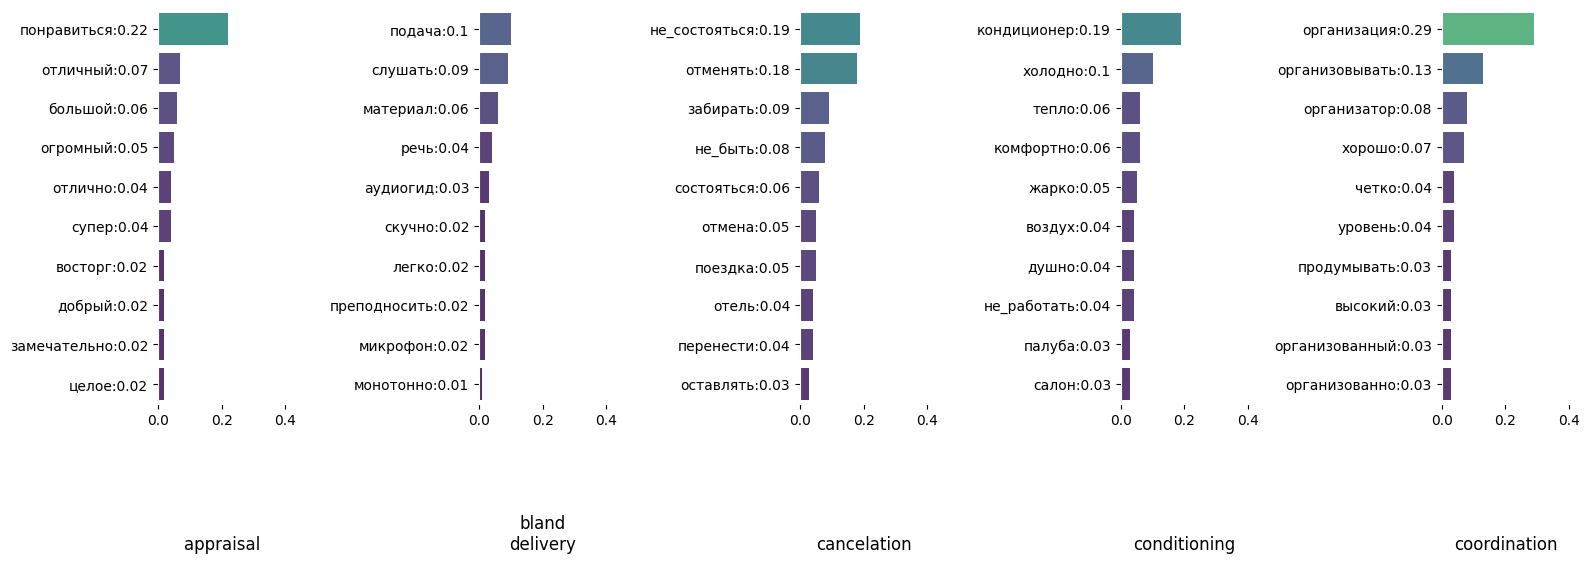

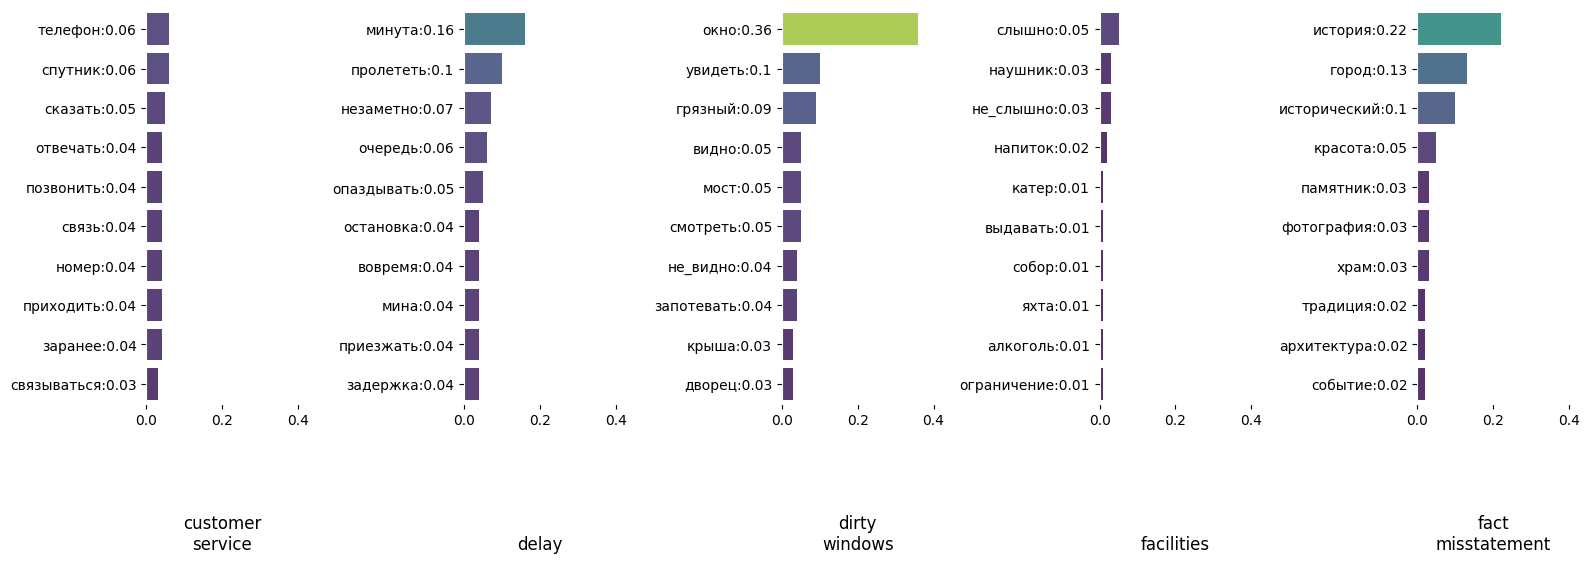

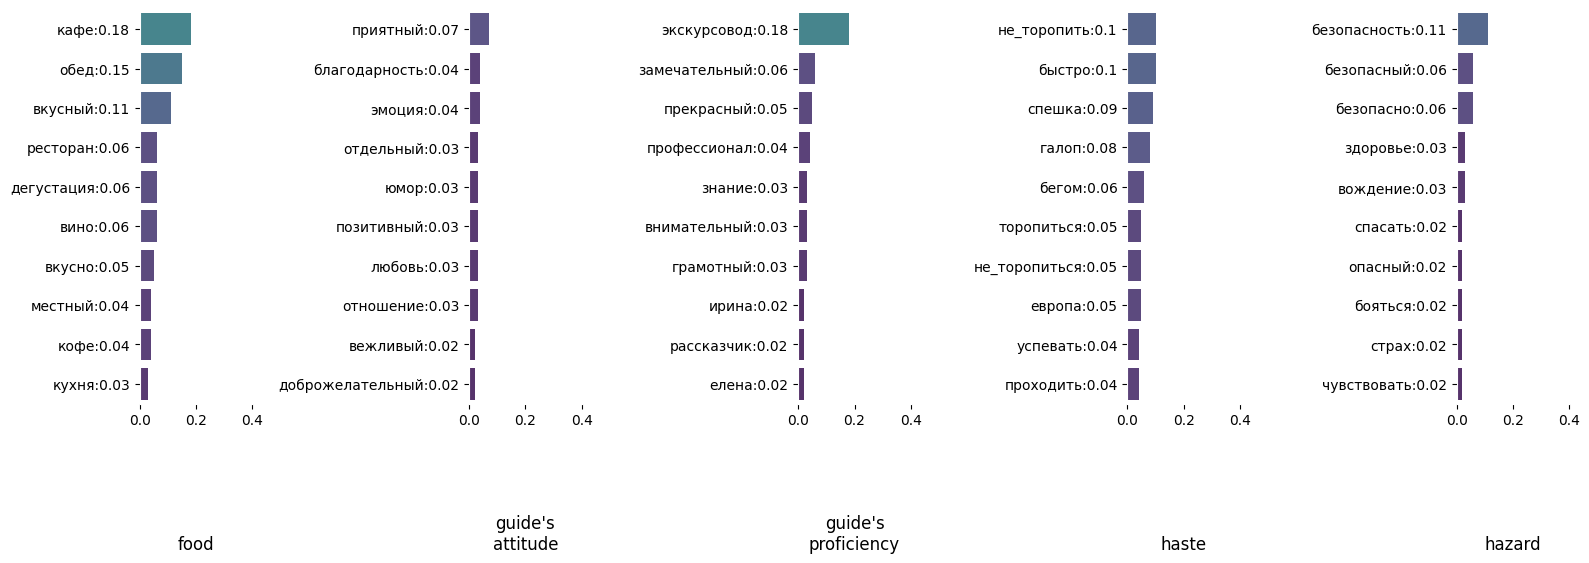

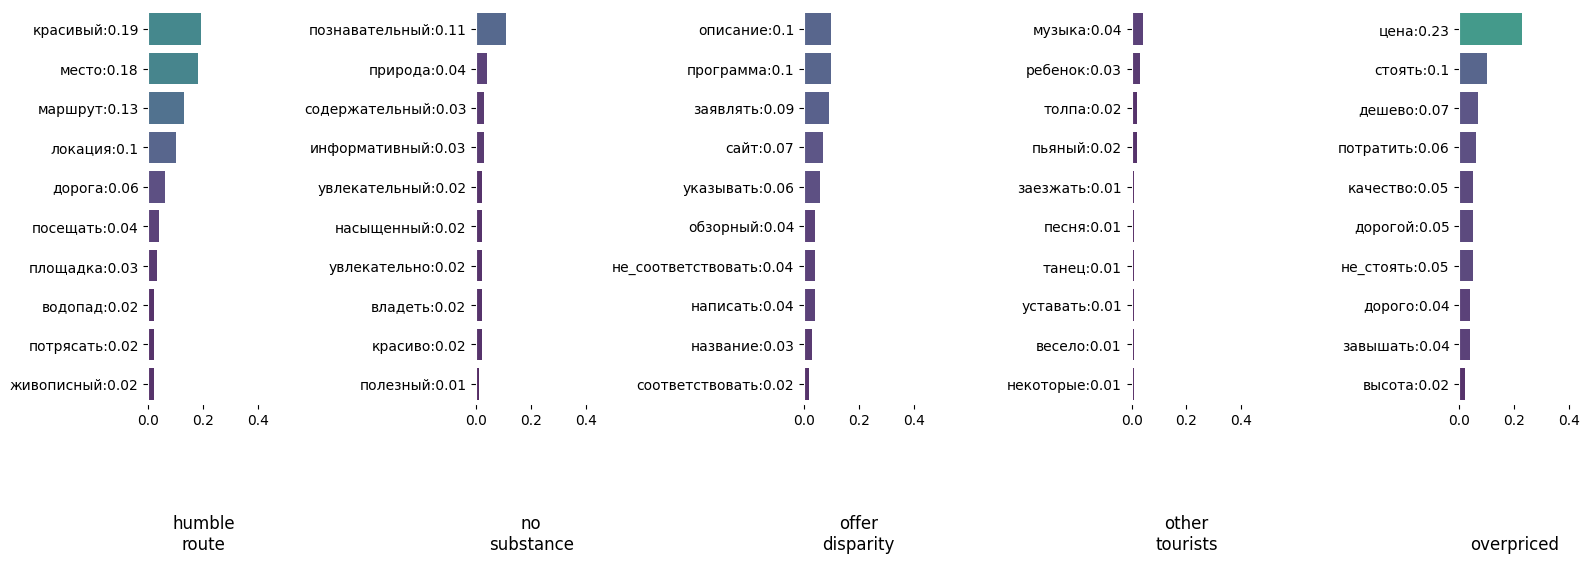

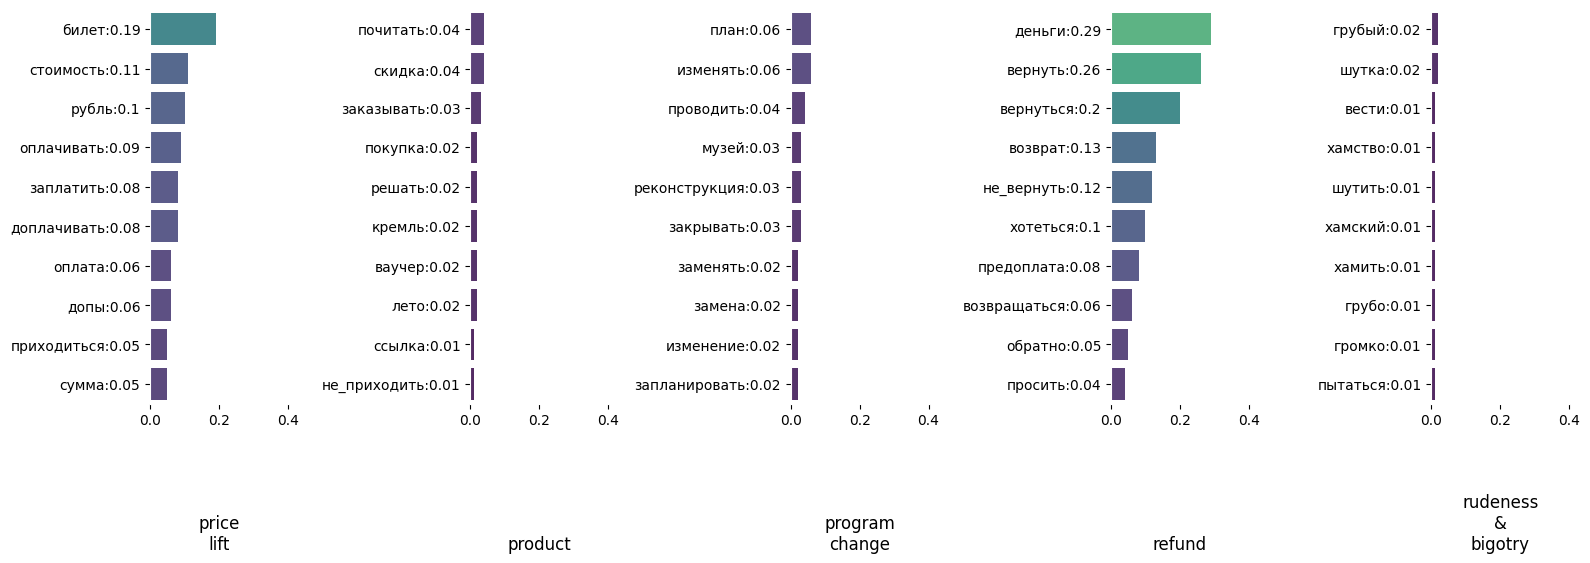

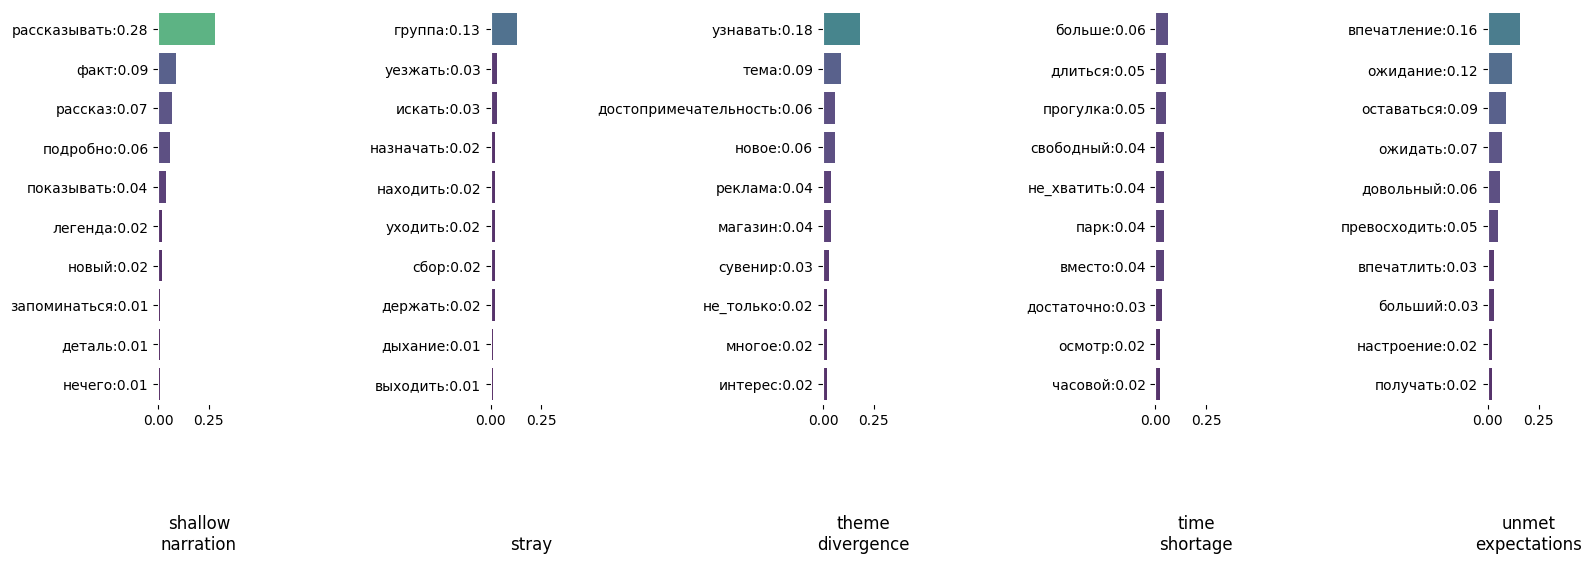

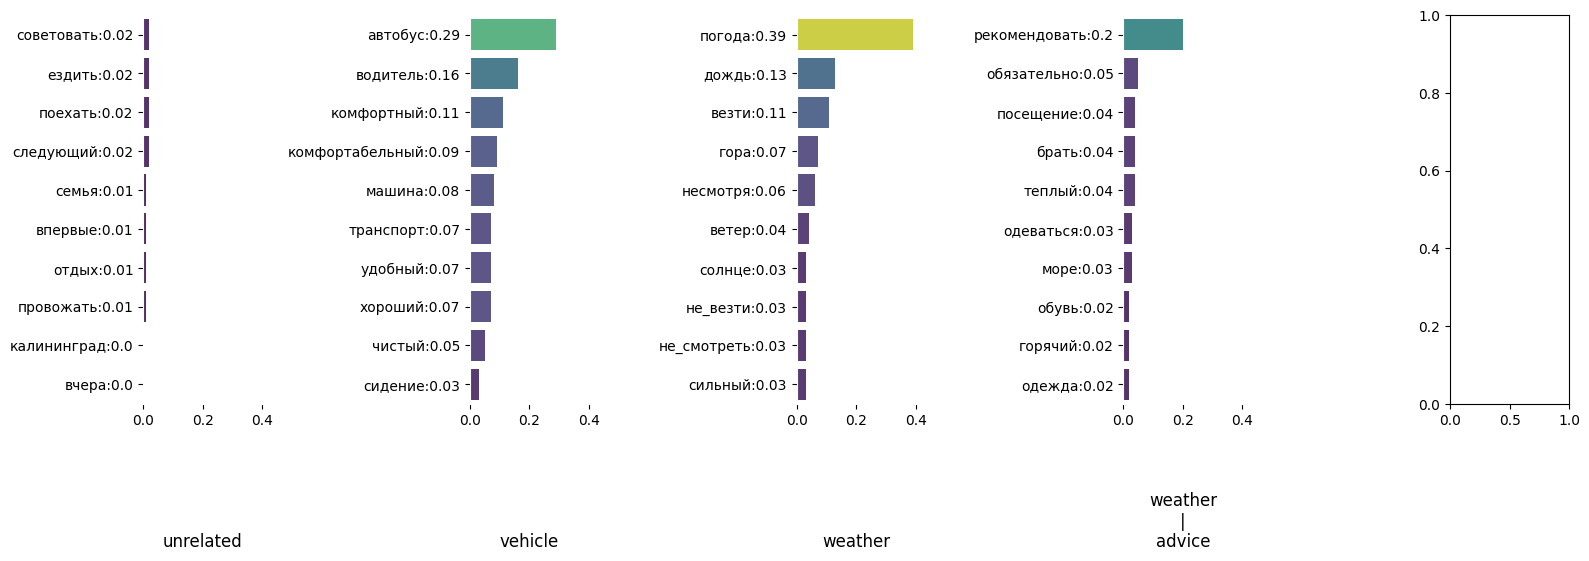

In [283]:
def printing_charts(b):
    ### b - number of last output aspect; a=b-5 - first output aspect
    fig, axs = plt.subplots(1, 5, figsize=(16,6), facecolor='white', squeeze=False)
    for col, df in zip(range(0, 5), keep_dfcon[b-5:b]):
        df = df.reset_index(drop=True).head(10)
        #print(df)
        label = [w + ':' + str(n) for w,n in zip(df['word'],df['relative_freq'].round(2))]
        color_l = [color_dict.get(i) for i in list((df['relative_freq'].round(2)*100).astype(int))]
        color_l = [c if c else '#DCDCDC' for c in color_l]
        x = list(df['relative_freq'].round(2))
        #x = list(df['freq'])
        y = list(range(0,10))

        sns.barplot(x = x, 
                    y = y, 
                    data=df, alpha=0.9, orient = 'h',
                    ax = axs[0][col], palette = color_l)
        axs[0][col].set_xlim(0, round((n+1)/100, 1))     #set X axis range max
        axs[0][col].set_yticklabels(label)
        axs[0][col].spines['bottom'].set_color('white')
        axs[0][col].spines['right'].set_color('white')
        axs[0][col].spines['top'].set_color('white')
        axs[0][col].spines['left'].set_color('white')
        title = df['label'].iloc[0].replace(' ','\n')
        axs[0][col].set_title(title, y=-0.39)        

    plt.tight_layout()    
    plt.show()
    
for k in range(5, 40, 5):
     printing_charts(k)

Treemaps

In [287]:
for_vis_top_df = for_vis_df.groupby('label').head(20).reset_index(drop=True)


In [310]:
import plotly.express as px
fig = px.treemap(for_vis_top_df, path=[px.Constant("review aspects"), 'label', 'word'],
                 values='relative_freq',
                 color='relative_freq', hover_data=['freq'],
                 color_continuous_scale='rdbu',
                 #'viridis',
                 color_continuous_midpoint=np.average(for_vis_df['relative_freq'])
                )
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [311]:
fig.write_html("./aspect_words_treemap.html")

## Clusterization

In [312]:
manually_labeled

sentence               label  \
0                                        Хороший сервис    customer service   
1     Встречающий "проводник" просто проводит вас до...               delay   
2                        Сказали спутник вернёт 5 евро.    customer service   
3              Очень перегружена историческими фактами.        no substance   
4     Даже не ожидали, что такая замечательная экску...  unmet expectations   
...                                                 ...                 ...   
3410  Но большинство наших "коллег" по экскурсии - т...      other tourists   
3411   Автобус подан не подготовленный: мусор в салоне.             vehicle   
3412                                Цена не оправданна.          overpriced   
3413                                        Дороговато!          overpriced   
3414                       Мало информации,общие фразы.        no substance   

                                                  words  
0                                     [хороший, сервис]  
1     [встречать, проводник, просто, проводить, вы, ...  
2                     [сказать, спутник, вернуть, евро]  
3              [очень, перегружать, исторический, факт]  
4     [даже, не_ожидать, что, такой, замечательный, ...  
...                                                 ...  
3410  [но, большинство, наш, коллега, по, экскурсия,...  
3411  [автобус, подавать, не_подготовить, мусор, в, ...  
3412                             [цена, не_оправданный]  
3413                                      [дороговатый]  
3414                   [мало, информация, общий, фраза]  

[3415 rows x 3 columns]

In [372]:
y_true = manually_labeled[['label']].label.map(orig_mapper).to_list()

In [316]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("laskovey/review_train3")
model = AutoModel.from_pretrained("laskovey/review_train3")

In [317]:
def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

In [318]:
train_toks = []
for s in tqdm(manually_labeled.sentence.to_list()):
    train_toks.append(embed_bert_cls(s, model, tokenizer))

100%|██████████| 3415/3415 [00:36<00:00, 94.19it/s] 


In [319]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from tqdm import tqdm

from tempfile import mkdtemp
from shutil import rmtree
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.metrics import fbeta_score, make_scorer


In [379]:
from sklearn.metrics import silhouette_score, mutual_info_score, adjusted_rand_score, adjusted_mutual_info_score

Unsupervised scorers cannot be used, since scorers require true values


db_scorer = make_scorer(davies_bouldin_score, response_method='predict', greater_is_better=False)
ch_scorer = make_scorer(calinski_harabasz_score, response_method='predict', greater_is_better=True)

In [338]:
mi_scorer = make_scorer(mutual_info_score, response_method='predict', greater_is_better=True)
ar_scorer = make_scorer(adjusted_rand_score, response_method='predict', greater_is_better=True)

In [344]:
%%time
knn_res = dict()



cachedir = mkdtemp() # creates temp directory

params = {'knn__n_clusters': [int(i) for i in np.linspace(32, 40, 5)], 
         'pca__n_components': [int(i) for i in np.linspace(2, 312, 10)],
          'pca__whiten': [True, False]
         }



knn_pipe = Pipeline([('pca', PCA(random_state=42)),
    ('knn', KMeans(random_state=42))], memory=cachedir)

knn_pipe_cv = GridSearchCV(estimator=knn_pipe, param_grid=params, 
                               scoring=['adjusted_mutual_info_score', 'adjusted_rand_score'], cv=5, n_jobs=1,
                               verbose=1, refit='adjusted_rand_score')

knn_pipe_cv.fit(np.array(train_toks))

rmtree(cachedir) # removes temp directory

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 3min 16s, sys: 29.2 s, total: 3min 46s
Wall time: 1min 28s


In [342]:
knn_pipe_cv.best_estimator

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator'

In [345]:
pd.DataFrame(knn_pipe_cv.cv_results_)[['params', 'mean_test_adjusted_mutual_info_score', 
                                    'mean_test_adjusted_rand_score']].sort_values('mean_test_adjusted_rand_score', ascending=False).style.bar(vmin=0, vmax=1)

In [341]:
knn_pipe_cv.best_estimator

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator'

In [368]:
cachedir = mkdtemp() # creates temp directory


params = {'n_clusters': [int(i) for i in np.linspace(32, 40, 5)], 
         'pca_n_components': [int(i) for i in np.linspace(2, 312, 10)],
          'pca_whiten': [True, False]
         }

predicted_clus = []

for n in tqdm(params['n_clusters']):
    for p in params['pca_n_components']:
        for w in params['pca_whiten']:
            print
            knn_pipe = Pipeline([('pca', PCA(random_state=42, n_components=p, whiten=w)),
                                 ('knn', KMeans(random_state=42, n_clusters=n))])
            knn_pipe.fit(np.array(train_toks))
            predicted_clus.append(knn_pipe.predict(np.array(train_toks)).tolist()) 
            

100%|██████████| 5/5 [00:35<00:00,  7.07s/it]


In [362]:
params_names = []

for n in params['n_clusters']:
    for p in params['pca_n_components']:
        for w in params['pca_whiten']:
            params_names.append(str(n)+' '+str(p)+' '+str(w))

In [380]:
metr = dict()

#for col in tqdm(clus.columns):
for i in tqdm(range(len(predicted_clus))):
    s = silhouette_score(np.array(train_toks), predicted_clus[i])
    #print('!')
    db = davies_bouldin_score(np.array(train_toks), predicted_clus[i])
    #print('!!')
    ch = calinski_harabasz_score(np.array(train_toks), predicted_clus[i])
    #print('!!!')
    mi = adjusted_mutual_info_score(y_true, predicted_clus[i])
    ar = adjusted_rand_score(y_true, predicted_clus[i])
    metr[params_names[i]] = {'silhouette': s, 
                             'db': db, 
                             'ch': ch,
                             'mi': mi,
                             'ar': ar}



100%|██████████| 100/100 [00:45<00:00,  2.20it/s]


In [381]:
metric_df = pd.DataFrame.from_dict(metr, orient='index')

In [382]:
metric_df

silhouette        db           ch        mi        ar
32 2 True       0.333334  2.121896   253.527710  0.788568  0.669220
32 2 False      0.338105  2.318408   246.835050  0.790853  0.683879
32 36 True      0.722200  0.966570  1219.542223  0.938248  0.935709
32 36 False     0.703064  0.753074  1330.865193  0.935509  0.934703
32 70 True      0.578224  1.109926   539.219613  0.899074  0.807646
...                  ...       ...          ...       ...       ...
40 243 False    0.578544  1.197610  1243.716501  0.918300  0.837115
40 277 True     0.118071  1.517064   116.262059  0.715521  0.319333
40 277 False    0.660177  1.141958  1267.496708  0.932187  0.928349
40 312 True     0.086820  2.189950   145.974463  0.753769  0.473979
40 312 False    0.634526  0.994867  1274.931174  0.930339  0.911975

[100 rows x 5 columns]

In [383]:
metric_df['weighed_coef'] = metric_df.silhouette * metric_df.ch * metric_df.mi * metric_df.ar / metric_df.db

In [384]:
metric_df.sort_values('weighed_coef', ascending=False)

silhouette        db           ch        mi        ar  \
36 105 False    0.668116  0.568541  1313.226048  0.936782  0.931993   
32 243 False    0.725769  0.810384  1418.520261  0.938596  0.936858   
32 139 False    0.707783  0.728614  1305.490394  0.936151  0.933854   
32 70 False     0.731292  0.832040  1429.520974  0.938824  0.936518   
34 139 False    0.684685  0.710189  1292.355402  0.936053  0.931604   
...                  ...       ...          ...       ...       ...   
40 277 True     0.118071  1.517064   116.262059  0.715521  0.319333   
38 277 True     0.114312  1.588028   121.325709  0.712415  0.327560   
32 312 True     0.114009  1.885470   133.167847  0.693091  0.302703   
34 312 True     0.065005  2.107033   125.812910  0.693474  0.289190   
32 277 True     0.046745  1.620597    93.403419  0.640462  0.201406   

              weighed_coef  
36 105 False   1347.350292  
32 243 False   1117.107530  
32 139 False   1108.665643  
32 70 False    1104.682173  
34 139 False   1086.501797  
...                    ...  
40 277 True       2.067485  
38 277 True       2.038026  
32 312 True       1.689378  
34 312 True       0.778416  
32 277 True       0.347524  

[100 rows x 6 columns]

In [385]:
manually_labeled

sentence               label  \
0                                        Хороший сервис    customer service   
1     Встречающий "проводник" просто проводит вас до...               delay   
2                        Сказали спутник вернёт 5 евро.    customer service   
3              Очень перегружена историческими фактами.        no substance   
4     Даже не ожидали, что такая замечательная экску...  unmet expectations   
...                                                 ...                 ...   
3410  Но большинство наших "коллег" по экскурсии - т...      other tourists   
3411   Автобус подан не подготовленный: мусор в салоне.             vehicle   
3412                                Цена не оправданна.          overpriced   
3413                                        Дороговато!          overpriced   
3414                       Мало информации,общие фразы.        no substance   

                                                  words  
0                                     [хороший, сервис]  
1     [встречать, проводник, просто, проводить, вы, ...  
2                     [сказать, спутник, вернуть, евро]  
3              [очень, перегружать, исторический, факт]  
4     [даже, не_ожидать, что, такой, замечательный, ...  
...                                                 ...  
3410  [но, большинство, наш, коллега, по, экскурсия,...  
3411  [автобус, подавать, не_подготовить, мусор, в, ...  
3412                             [цена, не_оправданный]  
3413                                      [дороговатый]  
3414                   [мало, информация, общий, фраза]  

[3415 rows x 3 columns]

In [386]:
clustered = manually_labeled.copy(deep=True)

In [387]:
clustered['orig_label_id'] = clustered.label.map(orig_mapper)

In [390]:
clustered['cluster'] = predicted_clus[params_names.index('36 105 False')]

Saving the model

In [459]:
knn_pipe_final = Pipeline([('pca', PCA(random_state=42, n_components=105, whiten=False)),
                                 ('knn', KMeans(random_state=42, n_clusters=36))])
knn_pipe_final.fit(np.array(train_toks))

Pipeline(steps=[('pca', PCA(n_components=105, random_state=42)),
                ('knn', KMeans(n_clusters=36, random_state=42))])

In [461]:
import pickle

pickle.dump(knn_pipe_final, open('final_kmeans_clustering.pkl', 'wb'))


Find correspondence of class label (classification taks) and cluster (clusterization)

In [392]:
clustered['cooccur'] = clustered.orig_label_id.astype(str) + ' ' + clustered.cluster.astype(str)

In [393]:
clustered

sentence               label  \
0                                        Хороший сервис    customer service   
1     Встречающий "проводник" просто проводит вас до...               delay   
2                        Сказали спутник вернёт 5 евро.    customer service   
3              Очень перегружена историческими фактами.        no substance   
4     Даже не ожидали, что такая замечательная экску...  unmet expectations   
...                                                 ...                 ...   
3410  Но большинство наших "коллег" по экскурсии - т...      other tourists   
3411   Автобус подан не подготовленный: мусор в салоне.             vehicle   
3412                                Цена не оправданна.          overpriced   
3413                                        Дороговато!          overpriced   
3414                       Мало информации,общие фразы.        no substance   

                                                  words  orig_label_id  \
0                                     [хороший, сервис]              0   
1     [встречать, проводник, просто, проводить, вы, ...              1   
2                     [сказать, спутник, вернуть, евро]              0   
3              [очень, перегружать, исторический, факт]              2   
4     [даже, не_ожидать, что, такой, замечательный, ...              3   
...                                                 ...            ...   
3410  [но, большинство, наш, коллега, по, экскурсия,...             15   
3411  [автобус, подавать, не_подготовить, мусор, в, ...              7   
3412                             [цена, не_оправданный]              9   
3413                                      [дороговатый]              9   
3414                   [мало, информация, общий, фраза]              2   

      cluster cooccur  
0           7     0 7  
1           2     1 2  
2           7     0 7  
3          11    2 11  
4           1     3 1  
...       ...     ...  
3410       31   15 31  
3411        4     7 4  
3412        5     9 5  
3413        5     9 5  
3414       11    2 11  

[3415 rows x 6 columns]

In [395]:
clustered.cooccur.value_counts()[:40]

cooccur
7 4      379
1 2      265
9 5      221
3 1      210
0 7      192
13 9     170
6 29     161
8 0      159
4 28     155
20 10    141
19 8     126
10 15    121
2 11     112
16 13     99
23 34     81
12 16     78
26 14     69
18 18     68
17 23     62
22 17     44
27 24     43
11 25     43
5 22      40
31 19     37
21 26     32
33 20     31
30 21     31
15 31     30
29 33     24
14 27     21
25 30     17
7 3       11
6 3       10
24 35      9
32 7       9
28 18      5
3 0        4
19 16      3
4 7        3
16 9       3
Name: count, dtype: int64

In [401]:
clus_mapper = dict()

for cooc in clustered.cooccur.value_counts().index.to_list():
    label_id, clu_id = cooc.split(' ')
    label_id = int(label_id)
    clu_id = int(clu_id)
    if clu_id not in clus_mapper:
        clus_mapper[clu_id] = label_id
    if len(clus_mapper)>36:
        break

In [403]:
len(clus_mapper)

36

In [402]:
clus_mapper

{4: 7,
 2: 1,
 5: 9,
 1: 3,
 7: 0,
 9: 13,
 29: 6,
 0: 8,
 28: 4,
 10: 20,
 8: 19,
 15: 10,
 11: 2,
 13: 16,
 34: 23,
 16: 12,
 14: 26,
 18: 18,
 23: 17,
 17: 22,
 24: 27,
 25: 11,
 22: 5,
 19: 31,
 26: 21,
 20: 33,
 21: 30,
 31: 15,
 33: 29,
 27: 14,
 30: 25,
 3: 7,
 35: 24,
 6: 4,
 12: 1,
 32: 3}

In [405]:
Counter(clus_mapper.values())

Counter({7: 2,
         1: 2,
         3: 2,
         4: 2,
         9: 1,
         0: 1,
         13: 1,
         6: 1,
         8: 1,
         20: 1,
         19: 1,
         10: 1,
         2: 1,
         16: 1,
         23: 1,
         12: 1,
         26: 1,
         18: 1,
         17: 1,
         22: 1,
         27: 1,
         11: 1,
         5: 1,
         31: 1,
         21: 1,
         33: 1,
         30: 1,
         15: 1,
         29: 1,
         14: 1,
         25: 1,
         24: 1})

In [408]:
orig_id_mapper[7]

'vehicle'

In [409]:
orig_id_mapper[1]

'delay'

In [410]:
orig_id_mapper[3]

'unmet expectations'

In [411]:
orig_id_mapper[2]

'no substance'

In [413]:
%%time
words_by_clus = dict()

for clus in clustered['cluster'].unique():
    words_by_clus[clus] = [w for lst in clustered[clustered.cluster==clus].words.to_list() for w in lst]

CPU times: user 47.6 ms, sys: 37.7 ms, total: 85.2 ms
Wall time: 125 ms


In [414]:
%%time
freqs_clus = []

for clus in words_by_clus:
        cnt = Counter(words_by_clus[clus])
        for uw in cnt:
            if len(uw)>2 and cnt[uw]>1:
                freqs_clus.append({'cluster': clus, 'word': uw, 'freq': cnt[uw]})


CPU times: user 30.1 ms, sys: 448 ms, total: 478 ms
Wall time: 1.28 s


In [416]:
sizes_clus = dict()

for clus in clustered['cluster'].unique():
    sizes_clus[clus] = len(clustered[clustered.cluster==clus])

In [418]:
sizes_clus

{7: 211,
 2: 272,
 11: 117,
 1: 214,
 28: 159,
 22: 42,
 29: 163,
 4: 384,
 0: 168,
 5: 226,
 15: 123,
 25: 46,
 16: 87,
 9: 179,
 27: 21,
 19: 39,
 31: 32,
 13: 103,
 10: 142,
 23: 62,
 18: 73,
 3: 22,
 8: 129,
 26: 33,
 17: 47,
 34: 82,
 35: 10,
 30: 18,
 21: 37,
 14: 69,
 24: 44,
 33: 24,
 12: 2,
 6: 2,
 20: 32,
 32: 1}

In [421]:

for f in freqs_clus:
    f['relative_freq'] = f['freq'] / sizes_clus[f['cluster']]

In [423]:
freqs_clus_df = pd.DataFrame(freqs_clus)

In [427]:
freqs_clus_df

cluster           word  freq  relative_freq
0           7         сервис     5       0.023697
1           7        сказать    13       0.061611
2           7        спутник    28       0.132701
3           7        вернуть     5       0.023697
4           7           евро     4       0.018957
...       ...            ...   ...            ...
2857       20           убор     2       0.062500
2858       20  рекомендовать     3       0.093750
2859       20         одежда     2       0.062500
2860       20         палуба     2       0.062500
2861       20  необходимость     2       0.062500

[2862 rows x 4 columns]

Pick words that repeat among aspects

In [429]:
freqs_clus_df.groupby('word').cluster.count()

word
sputnik       1
whatsapp      1
абсолютно     2
аванс         1
август        1
             ..
это          22
этот         10
юмор          1
явно          1
янтарь        2
Name: cluster, Length: 1151, dtype: int64

In [430]:
freqs_clus_df.sort_values(['word', 'relative_freq'], ascending=[True, False], inplace=True)

In [431]:
freqs_clus_df[(freqs_clus_df.relative_freq>.03)&(freqs_df.word.str.len()>3)].drop_duplicates(subset='word')

cluster         word  freq  relative_freq
2277        3      автобус    18       0.818182
2683       14        адрес     4       0.057971
1561       25    анастасия     2       0.043478
2429       26      арзамас     2       0.060606
802        22    атмосфера     2       0.047619
...       ...          ...   ...            ...
1569       16  экскурсовод    11       0.126437
6           7  электронный     9       0.042654
2621       30          это     4       0.222222
1908       31         этот     5       0.156250
814        22         юмор     2       0.047619

[521 rows x 4 columns]

In [432]:
for_vis_clus_df = freqs_clus_df[(freqs_clus_df.word.str.len()>3)&
                      (freqs_clus_df.word.isin(sw)==False)].sort_values(by=['word', 'relative_freq'], 
                                                                   ascending=[True, False]).drop_duplicates(
    subset='word').reset_index(drop=True)

In [438]:
freqs_clus_df.sort_values(by=['cluster', 'relative_freq'], ascending=[True, False], inplace=True)

In [443]:
#color dictionary
#n = for_vis_df['freq'].max()
#n = 100
n = (for_vis_clus_df['relative_freq'].max()*105).astype(int)
color_dict = get_colordict('viridis', n , 1)

#create a list contains DataFrame of each content
keep_dfcon = [for_vis_clus_df[for_vis_clus_df['cluster']==i] for i in for_vis_clus_df.cluster.unique()]
num_w = len(keep_dfcon)

In [446]:
for_vis_clus_df.cluster.nunique()

35

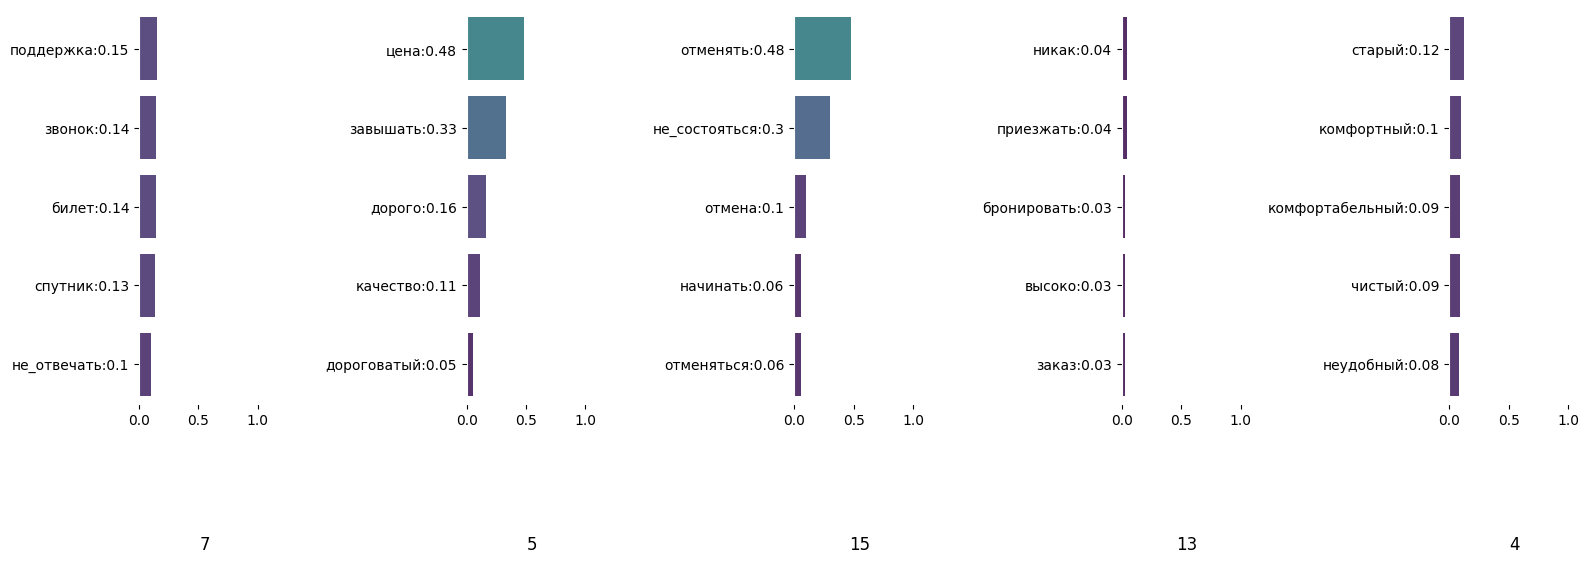

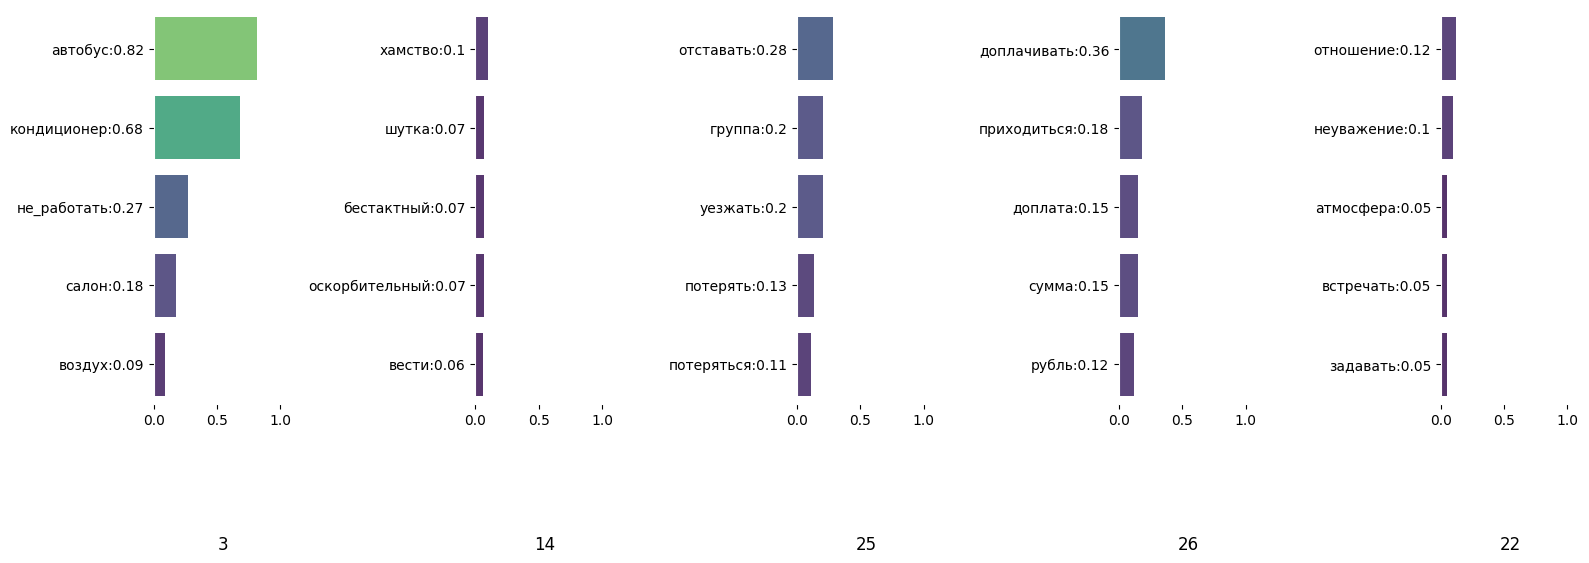

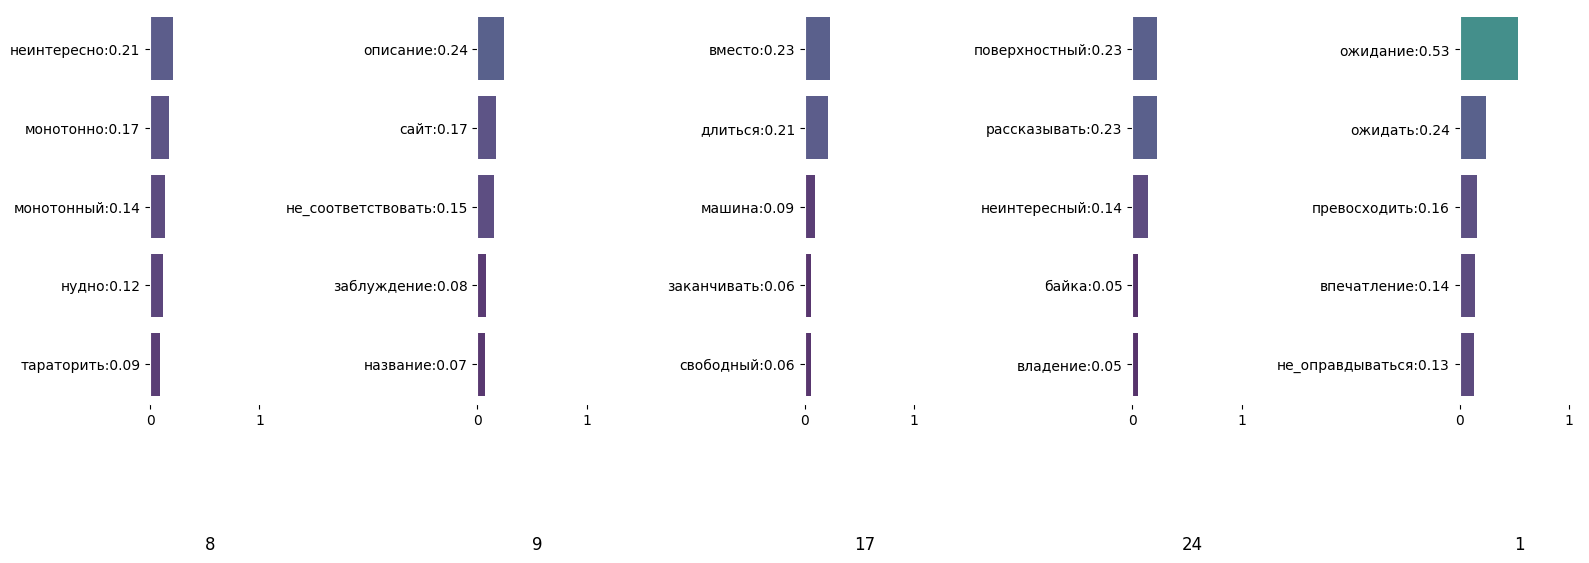

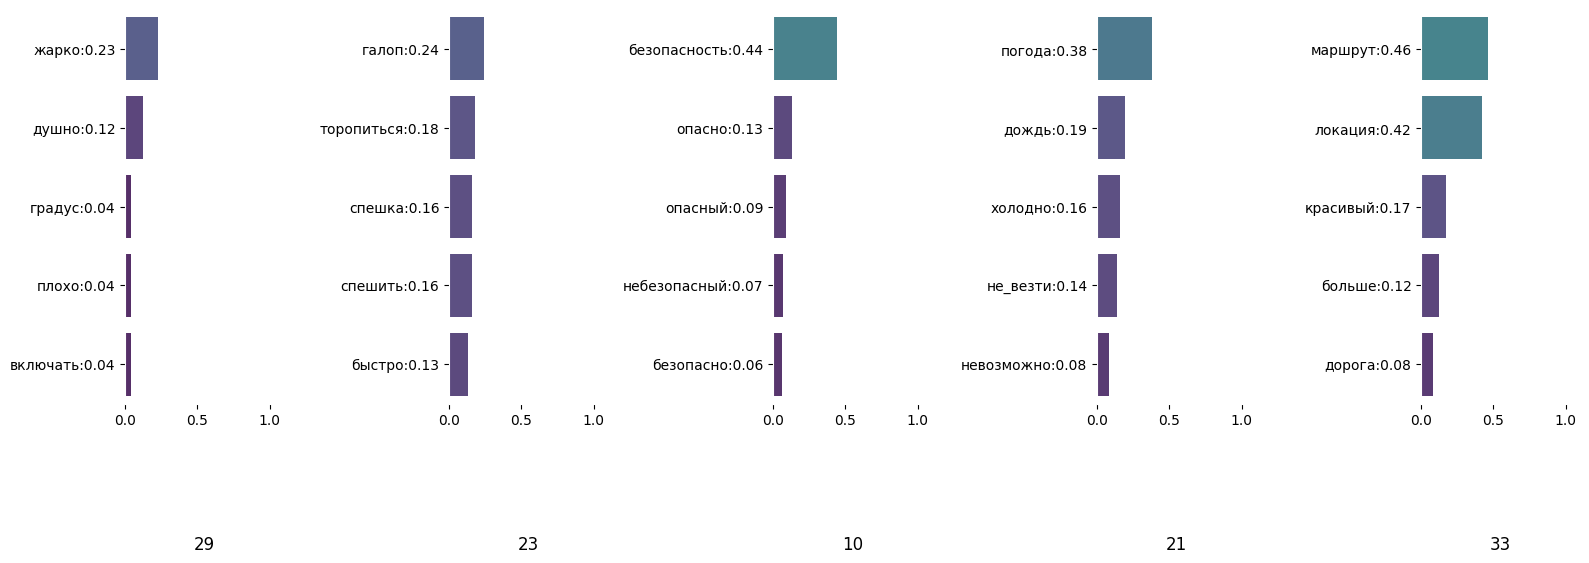

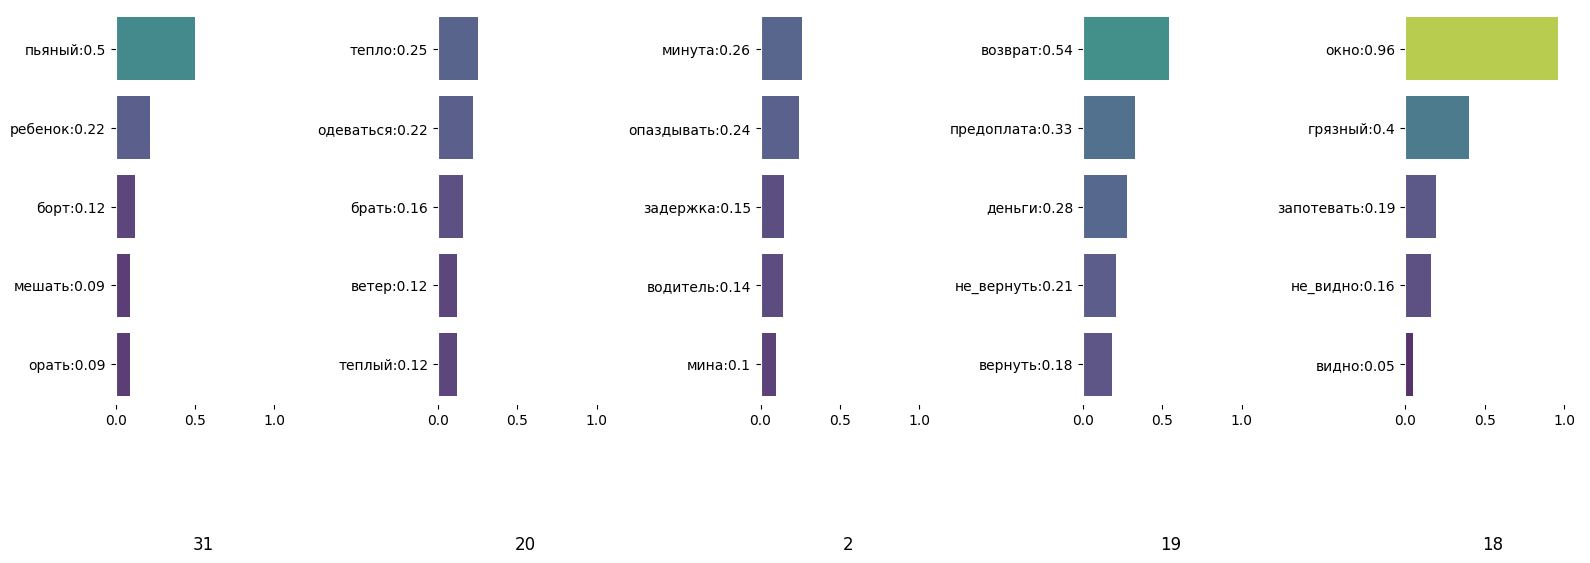

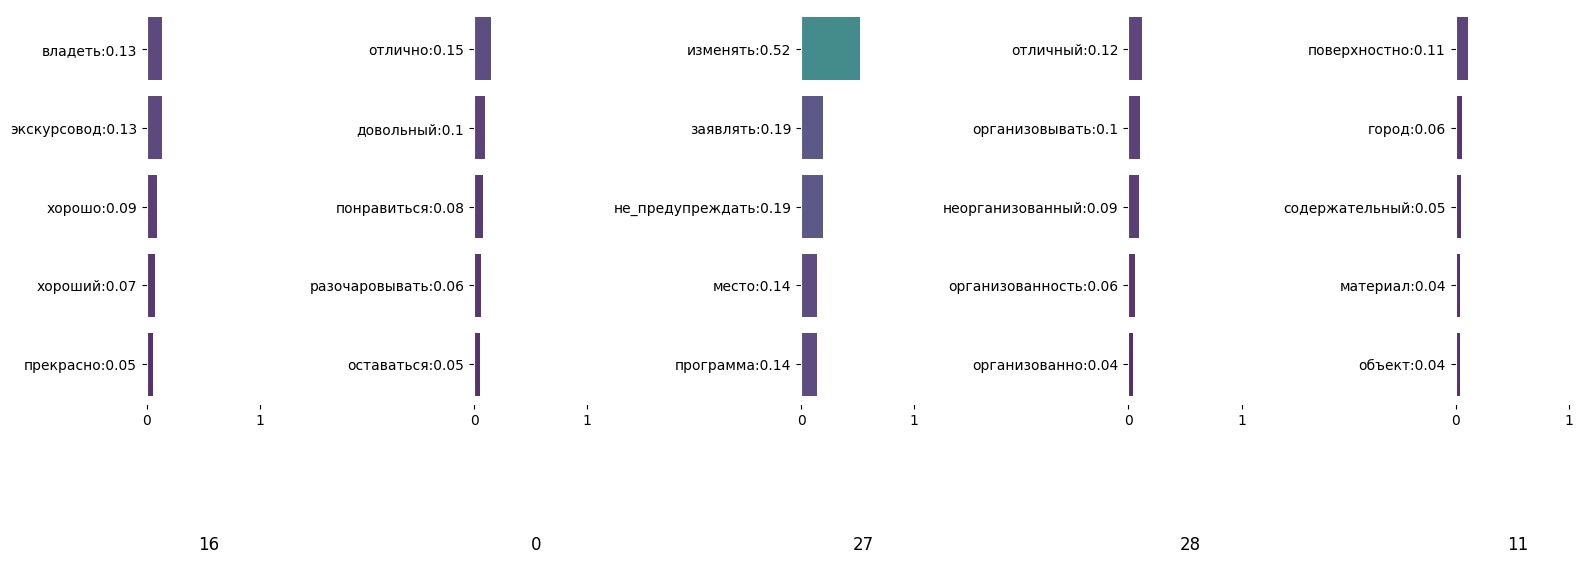

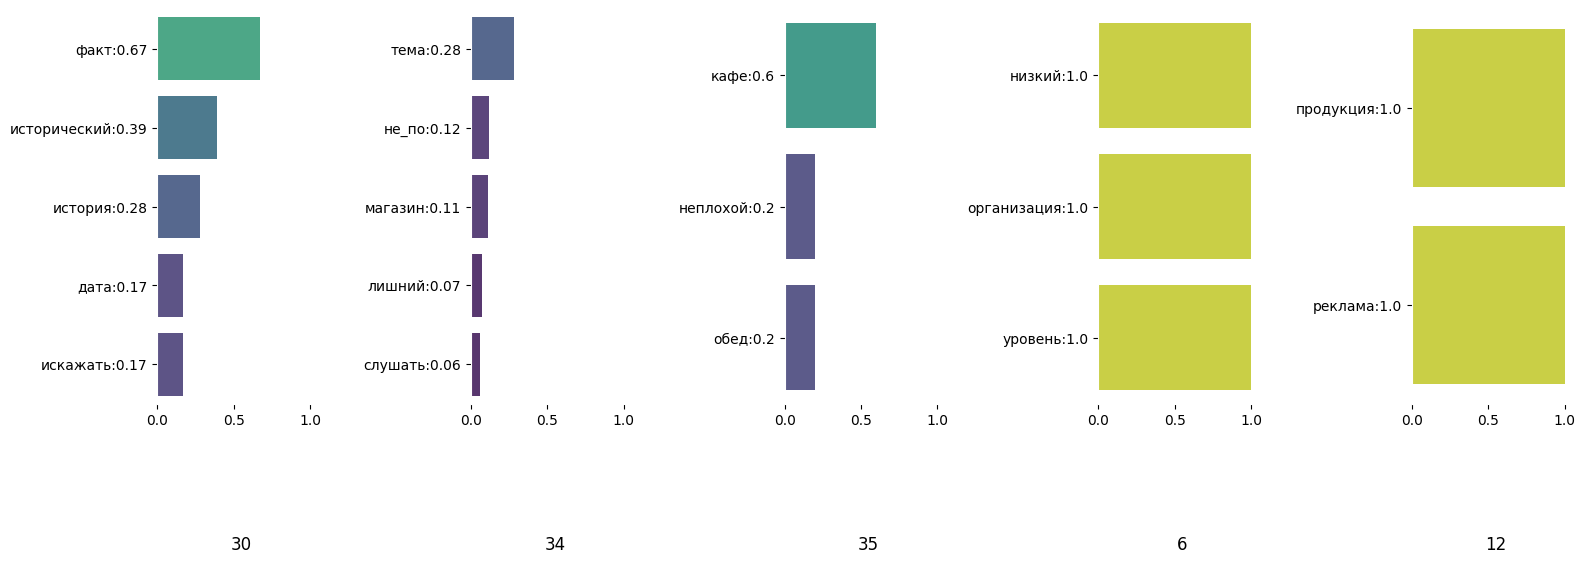

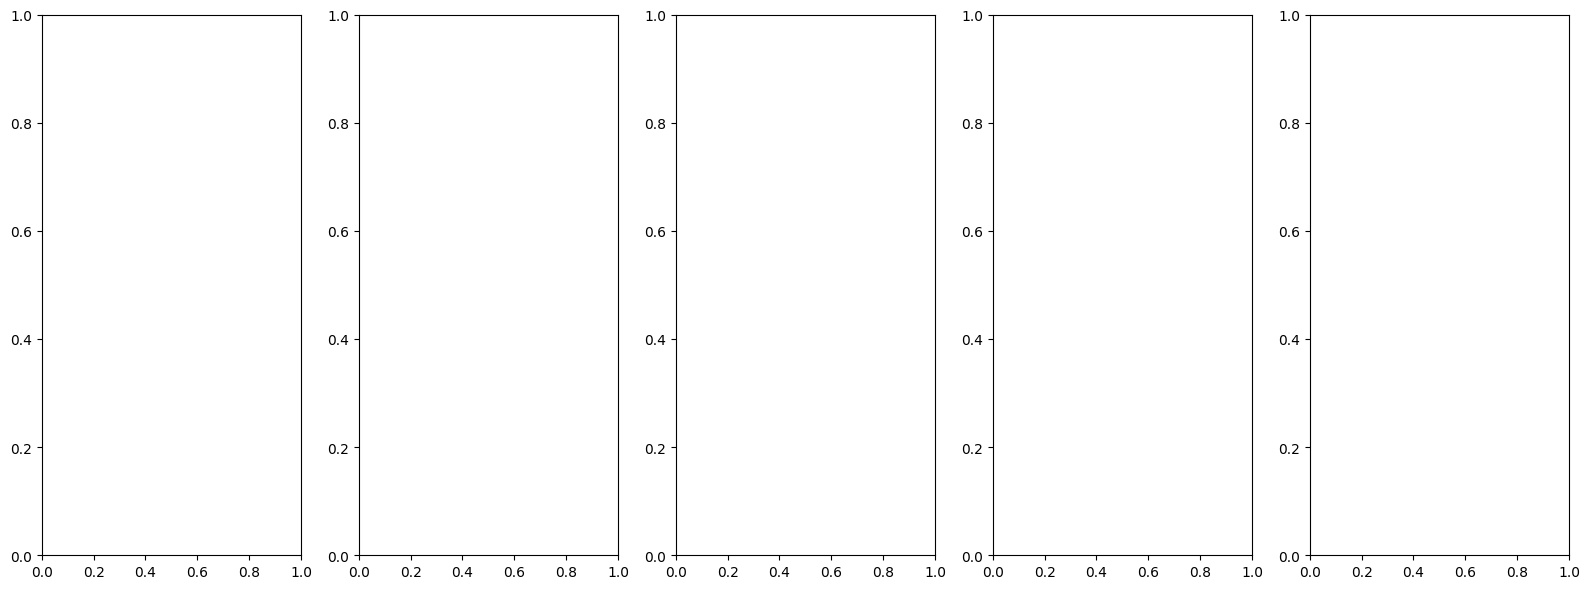

In [445]:
def printing_charts(b):
    ### b - number of last output aspect; a=b-5 - first output aspect
    fig, axs = plt.subplots(1, 5, figsize=(16,6), facecolor='white', squeeze=False)
    for col, df in zip(range(0, 5), keep_dfcon[b-5:b]):
        df = df.sort_values('relative_freq', ascending=False).reset_index(drop=True).head(5)
        #print(df)
        label = [w + ':' + str(n) for w,n in zip(df['word'],df['relative_freq'].round(2))]
        color_l = [color_dict.get(i) for i in list((df['relative_freq'].round(2)*100).astype(int))]
        color_l = [c if c else '#DCDCDC' for c in color_l]
        x = list(df['relative_freq'].round(2))
        #x = list(df['freq'])
        if len(df)>=5:
            y = list(range(0,5))
        else:
            y = list(range(0,len(df)))

        sns.barplot(x = x, 
                    y = y, 
                    data=df, alpha=0.9, orient = 'h',
                    ax = axs[0][col], palette = color_l)
        axs[0][col].set_xlim(0, round((n+1)/100, 1))     #set X axis range max
        axs[0][col].set_yticklabels(label)
        axs[0][col].spines['bottom'].set_color('white')
        axs[0][col].spines['right'].set_color('white')
        axs[0][col].spines['top'].set_color('white')
        axs[0][col].spines['left'].set_color('white')
        title = df['cluster'].iloc[0] #.replace(' ','\n')
        axs[0][col].set_title(title, y=-0.39)        

    plt.tight_layout()    
    plt.show()
    
for k in range(5, 45, 5):
     printing_charts(k)

Treemaps

In [447]:
for_vis_clus_top_df = for_vis_clus_df.groupby('cluster').head(20).reset_index(drop=True)


In [448]:
import plotly.express as px
fig = px.treemap(for_vis_clus_top_df, path=[px.Constant("review aspects clusters"), 'cluster', 'word'],
                 values='relative_freq',
                 color='relative_freq', hover_data=['freq'],
                 color_continuous_scale='rdbu',
                 #'viridis',
                 color_continuous_midpoint=np.average(for_vis_clus_top_df['relative_freq'])
                )
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [449]:
fig.write_html("./aspect_clusters_words_treemap.html")

In [450]:
clustered

sentence               label  \
0                                        Хороший сервис    customer service   
1     Встречающий "проводник" просто проводит вас до...               delay   
2                        Сказали спутник вернёт 5 евро.    customer service   
3              Очень перегружена историческими фактами.        no substance   
4     Даже не ожидали, что такая замечательная экску...  unmet expectations   
...                                                 ...                 ...   
3410  Но большинство наших "коллег" по экскурсии - т...      other tourists   
3411   Автобус подан не подготовленный: мусор в салоне.             vehicle   
3412                                Цена не оправданна.          overpriced   
3413                                        Дороговато!          overpriced   
3414                       Мало информации,общие фразы.        no substance   

                                                  words  orig_label_id  \
0                                     [хороший, сервис]              0   
1     [встречать, проводник, просто, проводить, вы, ...              1   
2                     [сказать, спутник, вернуть, евро]              0   
3              [очень, перегружать, исторический, факт]              2   
4     [даже, не_ожидать, что, такой, замечательный, ...              3   
...                                                 ...            ...   
3410  [но, большинство, наш, коллега, по, экскурсия,...             15   
3411  [автобус, подавать, не_подготовить, мусор, в, ...              7   
3412                             [цена, не_оправданный]              9   
3413                                      [дороговатый]              9   
3414                   [мало, информация, общий, фраза]              2   

      cluster cooccur  
0           7     0 7  
1           2     1 2  
2           7     0 7  
3          11    2 11  
4           1     3 1  
...       ...     ...  
3410       31   15 31  
3411        4     7 4  
3412        5     9 5  
3413        5     9 5  
3414       11    2 11  

[3415 rows x 6 columns]

In [453]:
clustered['cluster_name'] = clustered.cluster.map(clus_mapper).map(orig_id_mapper)

In [454]:
clustered

sentence               label  \
0                                        Хороший сервис    customer service   
1     Встречающий "проводник" просто проводит вас до...               delay   
2                        Сказали спутник вернёт 5 евро.    customer service   
3              Очень перегружена историческими фактами.        no substance   
4     Даже не ожидали, что такая замечательная экску...  unmet expectations   
...                                                 ...                 ...   
3410  Но большинство наших "коллег" по экскурсии - т...      other tourists   
3411   Автобус подан не подготовленный: мусор в салоне.             vehicle   
3412                                Цена не оправданна.          overpriced   
3413                                        Дороговато!          overpriced   
3414                       Мало информации,общие фразы.        no substance   

                                                  words  orig_label_id  \
0                                     [хороший, сервис]              0   
1     [встречать, проводник, просто, проводить, вы, ...              1   
2                     [сказать, спутник, вернуть, евро]              0   
3              [очень, перегружать, исторический, факт]              2   
4     [даже, не_ожидать, что, такой, замечательный, ...              3   
...                                                 ...            ...   
3410  [но, большинство, наш, коллега, по, экскурсия,...             15   
3411  [автобус, подавать, не_подготовить, мусор, в, ...              7   
3412                             [цена, не_оправданный]              9   
3413                                      [дороговатый]              9   
3414                   [мало, информация, общий, фраза]              2   

      cluster cooccur        cluster_name  
0           7     0 7    customer service  
1           2     1 2               delay  
2           7     0 7    customer service  
3          11    2 11        no substance  
4           1     3 1  unmet expectations  
...       ...     ...                 ...  
3410       31   15 31      other tourists  
3411        4     7 4             vehicle  
3412        5     9 5          overpriced  
3413        5     9 5          overpriced  
3414       11    2 11        no substance  

[3415 rows x 7 columns]

In [456]:
clustered.to_csv('./clustered_labeled_manual.csv', index=False)

In [457]:
clustered[clustered.label!=clustered.cluster_name]

sentence                label  \
12                 Квест полностью этому соответствовал      offer disparity   
33    Толкотня и бардак при посадке на теплоход, гид...                delay   
35               Мы остались очень довольны экскурсией!   unmet expectations   
37    приходилось долго ждать, а было холодно на ули...              vehicle   
57             Грязный, нет кондиционера и водитель хам              vehicle   
...                                                 ...                  ...   
2780      Скучно,монотонно,незнает тему экскурсии,года.  guide's proficiency   
3043  Реально поверностная экскурсия,с выхватыванием...         no substance   
3153  Экскурсовод на вкус и цвет, лично мне не понра...       bland delivery   
3286  Не совсем понравилось 2 момента:\n- использова...     theme divergence   
3366  Это уже прямое неуважение и оскорбление чувств...   rudeness & bigotry   

                                                  words  orig_label_id  \
12             [квест, полностью, это, соответствовать]             13   
33    [толкотня, и, бардак, при, посадка, на, теплох...              1   
35        [мы, оставаться, очень, довольный, экскурсия]              3   
37    [приходиться, долго, ждать, а, быть, холодно, ...              7   
57        [грязный, нет, кондиционер, и, водитель, хам]              7   
...                                                 ...            ...   
2780  [скучно, монотонно, незнавать, тема, экскурсия...             12   
3043  [реально, поверностной, экскурсия, с, выхватыв...              2   
3153  [экскурсовод, на, вкус, и, цвет, лично, я, не_...             19   
3286  [не_совсем, понравиться, момент, использование...             23   
3366  [это, уже, прямой, неуважение, и, оскорбление,...             26   

      cluster cooccur         cluster_name  
12          4    13 4              vehicle  
33         25    1 25                stray  
35          0     3 0            appraisal  
37          2     7 2                delay  
57         29    7 29         conditioning  
...       ...     ...                  ...  
2780        8    12 8       bland delivery  
3043        8     2 8       bland delivery  
3153       16   19 16  guide's proficiency  
3286       30   23 30    fact misstatement  
3366       22   26 22     guide's attitude  

[129 rows x 7 columns]

### Let's predict on a larger dataset

In [462]:
all_rev_sentences.head()

sentence     predicted_label  \
0  Cпасибо за интересный, познавательный и весёлы...               stray   
1      К сожалению, многое осталось не охваченным...  unmet expectations   
2                            тема то очень объёмная.        no substance   
3  Предлагаю составить отдельно туры по Парадной ...      program change   
4  Дмитрий (экскурсовод) без проблем и с удовольс...               stray   

   prediction_score                                              words  \
0          0.998513  [пасибо, за, интересный, познавательный, и, ве...   
1          0.965033  [к, сожаление, многое, оставаться, не_охватывать]   
2          0.983520                        [тема, то, очень, объемный]   
3          0.931045  [предлагать, составлять, отдельно, тур, по, па...   
4          0.979064  [дмитрий, экскурсовод, без, проблема, и, с, уд...   

  correct_predicted_label  
0     guide's proficiency  
1      unmet expectations  
2            no substance  
3          program change  
4     guide's proficiency

In [466]:
len(to_predict)

1008329

In [467]:
import random
random.seed(42)

In [468]:
to_predict_100k = random.sample(to_predict, 100000)

In [469]:
len(to_predict_100k)

100000

In [470]:
train_toks_clus = []
for s in tqdm(to_predict_100k):
    train_toks_clus.append(embed_bert_cls(s, model, tokenizer))

100%|██████████| 100000/100000 [10:34<00:00, 157.56it/s]


In [471]:
%%time
new_predicted_clus = knn_pipe_final.predict(np.array(train_toks_clus))

CPU times: user 564 ms, sys: 419 ms, total: 984 ms
Wall time: 1.13 s


In [473]:
new_predicted_clus[:10]

array([13, 16, 16,  7,  0, 19,  0, 30,  9,  0], dtype=int32)

In [475]:
new_predicted_clus_df = pd.DataFrame({'sentence': to_predict_100k, 'pred_cluster': new_predicted_clus})

In [476]:
new_predicted_clus_df

sentence  pred_cluster
0                    Если бы можно было поставить 100...            13
1      Казалось бы, такие места есть в любом городе, ...            16
2      Интересный рассказ, внимательное и обходительн...            16
3                             Ни сервиса ни вежливости..             7
4                           Экскурсия очень понравилась.             0
...                                                  ...           ...
99995  Огромная Вам благодарность за Ваше гостеприимс...             0
99996                           Связи с ними вообще нет.             7
99997  Поездка на Новый Афон в санитарный день не сос...            15
99998  Рассказывала вдохновенно,  увлекательно, с чув...             8
99999  Пока находились в ресторане , погода менялась ...            21

[100000 rows x 2 columns]

In [477]:
new_predicted_clus_df['pred_clus_label'] = new_predicted_clus_df.pred_cluster.map(clus_mapper)

In [481]:
new_predicted_clus_df['pred_clus_label_name'] = new_predicted_clus_df.pred_clus_label.map(orig_id_mapper)

In [478]:
new_predicted_clus_df

sentence  pred_cluster  \
0                    Если бы можно было поставить 100...            13   
1      Казалось бы, такие места есть в любом городе, ...            16   
2      Интересный рассказ, внимательное и обходительн...            16   
3                             Ни сервиса ни вежливости..             7   
4                           Экскурсия очень понравилась.             0   
...                                                  ...           ...   
99995  Огромная Вам благодарность за Ваше гостеприимс...             0   
99996                           Связи с ними вообще нет.             7   
99997  Поездка на Новый Афон в санитарный день не сос...            15   
99998  Рассказывала вдохновенно,  увлекательно, с чув...             8   
99999  Пока находились в ресторане , погода менялась ...            21   

       pred_clus_label  
0                   16  
1                   12  
2                   12  
3                    0  
4                    8  
...                ...  
99995                8  
99996                0  
99997               10  
99998               19  
99999               30  

[100000 rows x 3 columns]

In [482]:
new_predicted_clus_df = new_predicted_clus_df.merge(all_rev_sentences[['sentence', 'prediction_score', 'correct_predicted_label', 'words']], how='left', on='sentence')

In [483]:
new_predicted_clus_df

sentence  pred_cluster  \
0                      Если бы можно было поставить 100...            13   
1        Казалось бы, такие места есть в любом городе, ...            16   
2        Интересный рассказ, внимательное и обходительн...            16   
3                               Ни сервиса ни вежливости..             7   
4                             Экскурсия очень понравилась.             0   
...                                                    ...           ...   
4217834  Огромная Вам благодарность за Ваше гостеприимс...             0   
4217835                           Связи с ними вообще нет.             7   
4217836  Поездка на Новый Афон в санитарный день не сос...            15   
4217837  Рассказывала вдохновенно,  увлекательно, с чув...             8   
4217838  Пока находились в ресторане , погода менялась ...            21   

         pred_clus_label pred_clus_label_name  prediction_score  \
0                     16            unrelated          0.991362   
1                     12  guide's proficiency          0.994126   
2                     12  guide's proficiency          0.976098   
3                      0     customer service          0.998966   
4                      8            appraisal          0.999557   
...                  ...                  ...               ...   
4217834                8            appraisal          0.992342   
4217835                0     customer service          0.984219   
4217836               10          cancelation          0.999841   
4217837               19       bland delivery          0.595296   
4217838               30              weather          0.444439   

        correct_predicted_label  \
0                     unrelated   
1           guide's proficiency   
2           guide's proficiency   
3              customer service   
4                     appraisal   
...                         ...   
4217834               appraisal   
4217835        customer service   
4217836             cancelation   
4217837          bland delivery   
4217838                 weather   

                                                     words  
0                      [если, бы, можно, быть, поставлять]  
1        [казаться, бы, такой, место, быть, в, любой, г...  
2        [интересный, рассказ, внимательный, и, обходит...  
3                             [ни, сервис, ни, вежливость]  
4                          [экскурсия, очень, понравиться]  
...                                                    ...  
4217834  [огромный, вы, благодарность, за, ваш, гостепр...  
4217835                       [связь, с, они, вообще, нет]  
4217836  [поездка, на, новый, афон, в, санитарный, день...  
4217837  [рассказывать, вдохновенно, увлекательно, с, ч...  
4217838  [пока, находиться, в, ресторан, погода, менять...  

[4217839 rows x 7 columns]

In [487]:
new_predicted_clus_df = new_predicted_clus_df.drop_duplicates(subset='sentence').reset_index(drop=True)

Let's see, for how much of data instances classification and clustering predictions do not match

In [488]:
new_predicted_clus_df[new_predicted_clus_df.correct_predicted_label!=new_predicted_clus_df.pred_clus_label_name]

sentence  pred_cluster  \
14     Но при факте,что экскурсовод имеет небольшие д...             6   
17     Интересный опыт и возможность попасть в необыч...            16   
19     Перед началом экскурсии, не скрою, были волнен...            30   
21     Они летают вокруг очень близко и можно сделать...            32   
37     Не знаю, вина ли это компании Спутник или прос...            13   
...                                                  ...           ...   
91008                                         Без крыши!            18   
91022                               Влюбились в Тбилиси!            22   
91024  В самом начале гостеприимно встретил и рассказ...            25   
91051                Я думал будет больше рек и каналов.            18   
91054  Из-за потерянного времени, прогулка по парку б...            17   

       pred_clus_label pred_clus_label_name  prediction_score  \
14                   4         coordination          0.712215   
17                  12  guide's proficiency          0.405840   
19                  25    fact misstatement          0.535427   
21                   3   unmet expectations          0.367504   
37                  16            unrelated          0.732233   
...                ...                  ...               ...   
91008               18        dirty windows          0.473418   
91022                5     guide's attitude          0.577290   
91024               11                stray          0.337936   
91051               18        dirty windows          0.454162   
91054               22        time shortage          0.659542   

      correct_predicted_label  \
14               no substance   
17          fact misstatement   
19        guide's proficiency   
21               coordination   
37                 facilities   
...                       ...   
91008                  hazard   
91022               unrelated   
91024            coordination   
91051              facilities   
91054          program change   

                                                   words  
14     [но, при, факт, что, экскурсовод, иметь, небол...  
17     [интересный, опыт, и, возможность, попадать, в...  
19     [перед, начало, экскурсия, не_скрывать, быть, ...  
21     [они, летать, вокруг, очень, близко, и, можно,...  
37     [не_знать, вино, ли, это, компания, спутник, и...  
...                                                  ...  
91008                                       [без, крыша]  
91022                           [влюбляться, в, тбилиси]  
91024  [в, самый, начало, гостеприимно, встречать, и,...  
91051          [я, думать, быть, больше, река, и, канал]  
91054  [изза, потерять, время, прогулка, по, парк, бы...  

[8438 rows x 7 columns]

In [489]:
8438 / len(new_predicted_clus_df)

0.09264891572879495

In [490]:
correct_pred_df = new_predicted_clus_df[new_predicted_clus_df.correct_predicted_label==new_predicted_clus_df.pred_clus_label_name].reset_index(drop=True)

In [491]:
correct_pred_df.prediction_score.describe()

count    82637.000000
mean         0.876570
std          0.178364
min          0.131481
25%          0.804338
50%          0.977645
75%          0.998880
max          0.999987
Name: prediction_score, dtype: float64

In [492]:
correct_pred_df.correct_predicted_label.value_counts()

correct_predicted_label
guide's proficiency    12405
appraisal              10992
unrelated               9034
no substance            5439
guide's attitude        4361
coordination            3565
unmet expectations      3037
vehicle                 3030
customer service        2677
shallow narration       2634
delay                   2488
humble route            2317
offer disparity         2130
time shortage           2093
bland delivery          1992
weather                 1921
stray                   1462
weather | advice        1292
fact misstatement       1224
overpriced              1176
other tourists          1072
hazard                   843
rudeness & bigotry       828
food                     798
theme divergence         768
haste                    525
price lift               509
program change           464
cancelation              442
conditioning             414
refund                   370
dirty windows            335
Name: count, dtype: int64

In [493]:
correct_pred_df.correct_predicted_label.value_counts(normalize=True)

correct_predicted_label
guide's proficiency    0.150114
appraisal              0.133015
unrelated              0.109321
no substance           0.065818
guide's attitude       0.052773
coordination           0.043140
unmet expectations     0.036751
vehicle                0.036666
customer service       0.032395
shallow narration      0.031874
delay                  0.030108
humble route           0.028038
offer disparity        0.025775
time shortage          0.025328
bland delivery         0.024105
weather                0.023246
stray                  0.017692
weather | advice       0.015635
fact misstatement      0.014812
overpriced             0.014231
other tourists         0.012972
hazard                 0.010201
rudeness & bigotry     0.010020
food                   0.009657
theme divergence       0.009294
haste                  0.006353
price lift             0.006159
program change         0.005615
cancelation            0.005349
conditioning           0.005010
refund          

In [495]:
len(correct_pred_df[correct_pred_df.prediction_score>.8])

62281

In [494]:
correct_pred_df[correct_pred_df.prediction_score>.8].correct_predicted_label.value_counts()

correct_predicted_label
guide's proficiency    9575
appraisal              9374
unrelated              7012
no substance           4436
coordination           2928
guide's attitude       2809
vehicle                2626
unmet expectations     2461
delay                  2210
customer service       2106
shallow narration      1769
offer disparity        1762
time shortage          1535
bland delivery         1521
humble route           1428
weather                1415
overpriced             1070
stray                   724
weather | advice        677
hazard                  595
rudeness & bigotry      556
theme divergence        489
haste                   411
fact misstatement       403
price lift              402
cancelation             399
conditioning            390
refund                  270
other tourists          262
program change          236
food                    227
dirty windows           203
Name: count, dtype: int64

In [496]:
correct_pred_df[correct_pred_df.prediction_score>.8].to_csv('./certain_labels.csv', index=False)

In [497]:
correct_pred_df.correct_predicted_label.nunique()

32

In [498]:
orig_mapper

{'customer service': 0,
 'delay': 1,
 'no substance': 2,
 'unmet expectations': 3,
 'coordination': 4,
 "guide's attitude": 5,
 'conditioning': 6,
 'vehicle': 7,
 'appraisal': 8,
 'overpriced': 9,
 'cancelation': 10,
 'stray': 11,
 "guide's proficiency": 12,
 'offer disparity': 13,
 'program change': 14,
 'other tourists': 15,
 'unrelated': 16,
 'haste': 17,
 'dirty windows': 18,
 'bland delivery': 19,
 'hazard': 20,
 'price lift': 21,
 'time shortage': 22,
 'theme divergence': 23,
 'food': 24,
 'fact misstatement': 25,
 'rudeness & bigotry': 26,
 'shallow narration': 27,
 'facilities': 28,
 'humble route': 29,
 'weather': 30,
 'refund': 31,
 'product': 32,
 'weather | advice': 33}